In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import norm
#import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', 500)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

In [4]:
df0 = pd.read_csv("AutoScout_Part_2.csv")

In [5]:
df = df0.copy()

In [6]:
df.shape #(24375,31)

(24375, 31)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375 entries, 0 to 24374
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make_model                 24375 non-null  object 
 1   make                       24375 non-null  object 
 2   location                   24375 non-null  object 
 3   price                      24375 non-null  int64  
 4   body_type                  24375 non-null  object 
 5   type                       24375 non-null  object 
 6   doors                      24375 non-null  float64
 7   warranty                   24375 non-null  object 
 8   mileage                    24375 non-null  float64
 9   gearbox                    24375 non-null  object 
 10  fuel_type                  24375 non-null  object 
 11  paint                      24375 non-null  object 
 12  seller                     24375 non-null  object 
 13  seats                      24375 non-null  flo

In [9]:
# Calculating of limits
def limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    print("Lower Limit:",lower_lim) 
    print("Upper limit:", upper_lim)

In [10]:
# Counting of Outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return ((df[column]<lower_lim) | (df[column]>upper_lim)).sum()

In [11]:
# Dropping of Outliers
def dropping_of_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return df[column].loc[~((df[column]<lower_lim) | (df[column]>upper_lim))]

In [12]:
def describe(column):
    print("Column Name    : ", column)
    print("-"*40)
    print("Per_of_nulls   : ", "%", round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print("Num_of_nulls   : ", df[column].isnull().sum())
    print("Num_of_uniques : ", df[column].nunique())
    print("-"*40)
    print(df[column].value_counts(dropna = False))

In [13]:
def analyze(column):

    # Graphs
    if pd.api.types.is_numeric_dtype(df[column]):
        # boxplot for numeric columns
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')

        #scatterplot (with price) for numeric columns
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=df[column], y=df['price'])
        plt.title(f'Scatterplot for {column} and price')

        plt.show()
    else:
        #boxplot (with price) for categoric columns
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column], y=df['price'])
        plt.title(f'Boxplot for {column} and price')
        plt.xticks(rotation=45)
        plt.show()

<a id="13"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> price </span></h1>
</div>

<div class="alert alert-block alert-warning">
<b>Operation : </b> 
Let's remove <span style="color:red"><b> the outlier values</b></span> from the "first_registration" column.
</div>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [14]:
df.price.describe()

# std is bigger than mean so there are outliers in this feature

count     24375.00
mean      23822.72
std       26418.65
min         490.00
25%       11900.00
50%       18650.00
75%       28488.00
max     1346900.00
Name: price, dtype: float64

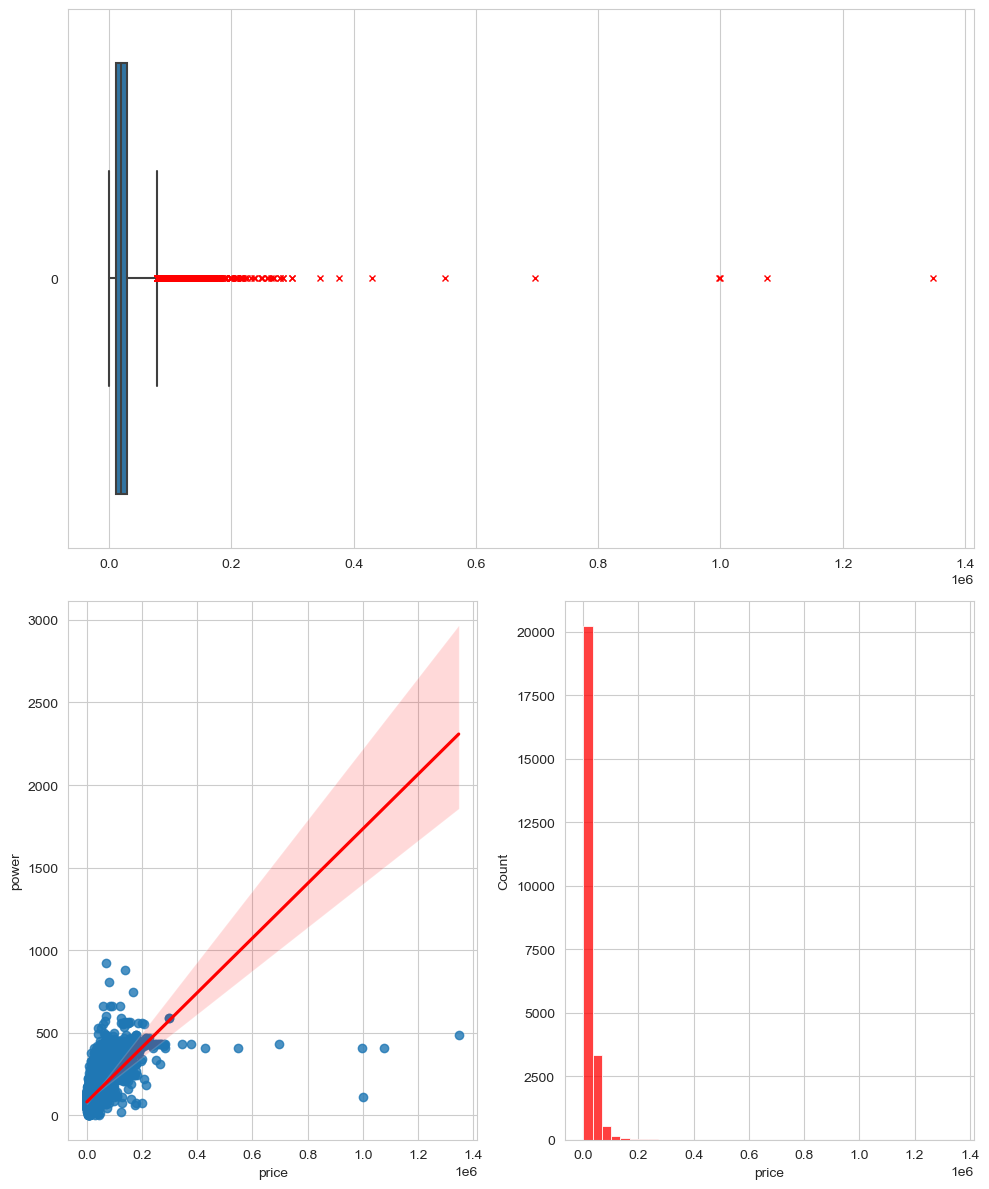

In [15]:
# Let's detect the POSSIBLE OUTLIERS with graphs

plt.figure(figsize=(10, 12))

plt.subplot(211)
sns.boxplot(df.price, orient="h", whis=3, flierprops={"marker": "x", "markeredgecolor": "red"})

plt.subplot(223)
sns.regplot(data=df, x=df.price, y=df.power, line_kws={'color': 'r'})

plt.subplot(224)
sns.histplot(df.price, bins=40, color="red")

plt.tight_layout();

- By 04.06.24 actual domain search for possible outliers according to make_models from www.autoscout24.com

Make_Model	            Lowest_Price	Highest_Price

Mercedes Benz AMG GT	55350	        348900
Nissan GT-R 	        55000	        240000
Mercedes Benz EQS 	    63000	        182000
Ford Mustang	         1000	        358000
Mercedes Benz S 580	    92000	        654000
Mercedes Benz G 63 AMG	35000	       1700000
Mercedes Benz S 63 AMG	13000	        428000
Ford GT	                 8000	       1600000
Mercedes Benz G 500 	30000	        240000
Mercedes Benz E 63 AMG	30000	        199000
Mercedes Benz C 63 AMG	34000	        180000
Nissan Skyline	         5000	        269000
Volvo 240	             2000	         30000
Fiat Coupe	             1300	        145000
Ford Ranger	             3600	        120000
Ford M	                10000	         64000
Toyota Supra	        10000	        175000
Fiat 131	             2000	        260000
Renault R 5	            65000	        280000
Renault Alpine	        56000	        119000


When compared to our dataset Volvo 240 and Ford M seems to have outliers.

Moreover some make and models like Renault R 5, Fiat 131, Ford M, Fiat Coupe, Volvo 240, Nissan Skyline, Ford GT are generally older cars. When those cars are replica or upgraded prices increase very much but they seem to be unique and highly priced.

In [16]:
# According to domain knowledge let's find the differences between maximum and minimum price values between same make_models

make_price_gap = df.groupby("make_model")["price"].agg(["max", "min"])

In [17]:
make_price_gap["price_range"] = make_price_gap["max"] - make_price_gap["min"]

In [18]:
big_price_gap = make_price_gap[make_price_gap["price_range"] > 100000].index

In [19]:
df[df["make_model"].isin(big_price_gap)].groupby("make_model")["price"].describe()

# as you can see some of the standard deviations are more than means 
# and maximum prices of some make_models are really high 

,count,mean,std,min,25%,50%,75%,max
make_model,,,,,,,,
Fiat 131,4.00,68850.00,97469.60,14000.00,20000.00,23250.00,72100.00,214900.00
Fiat Coupe,160.00,12387.08,13410.80,950.00,5999.75,9500.00,14922.50,150000.00
Ford GT,8.00,607400.00,474151.51,129950.00,167337.50,489500.00,1017475.00,1346900.00
Ford M,2.00,72500.00,74246.21,20000.00,46250.00,72500.00,98750.00,125000.00
Ford Mustang,629.00,47105.66,25176.97,5950.00,32950.00,42550.00,54950.00,208101.00
Ford Ranger,36.00,45550.25,36964.40,23999.00,34103.00,37225.00,42732.50,250000.00
Mercedes Benz 190,4.00,127309.75,73831.69,49900.00,71980.00,129670.00,184999.75,199999.00
Mercedes Benz 220,6.00,67808.33,72332.69,7000.00,8725.00,43175.00,115987.50,176000.00
Mercedes Benz 230,3.00,67963.33,59032.05,9990.00,37945.00,65900.00,96950.00,128000.00


In [20]:
# Define a function to flag outliers using IQR within the gapped make and model groups
def flag_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR

    group['is_outlier'] = (group['price'] > upper_bound)
    return group

# Apply outlier detection only to the big gapped make_model groups
df['is_outlier'] = False  # Initialize the is_outlier column
for model in big_price_gap:
    df.loc[df['make_model'] == model, 'is_outlier'] = flag_outliers(df[df['make_model'] == model])['is_outlier']


In [21]:
outlier_index = df[df["is_outlier"] == True].index

In [22]:
df.drop(outlier_index, axis=0, inplace=True)

In [23]:
df.price.describe()

count     24308.00
mean      23450.23
std       24435.71
min         490.00
25%       11900.00
50%       18520.00
75%       28249.25
max     1346900.00
Name: price, dtype: float64

In [24]:
df[df["make_model"].isin(big_price_gap)].groupby("make_model")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
make_model,,,,,,,,
Fiat 131,3.00,20166.67,5484.83,14000.00,18000.00,22000.00,23250.00,24500.00
Fiat Coupe,153.00,10482.63,5728.45,950.00,5970.00,9000.00,13990.00,27000.00
Ford GT,8.00,607400.00,474151.51,129950.00,167337.50,489500.00,1017475.00,1346900.00
Ford M,2.00,72500.00,74246.21,20000.00,46250.00,72500.00,98750.00,125000.00
Ford Mustang,596.00,42603.55,14937.63,5950.00,32567.50,41625.00,52982.50,86000.00
Ford Ranger,32.00,36732.91,6370.48,23999.00,31533.75,36985.00,40240.00,51490.00
Mercedes Benz 190,4.00,127309.75,73831.69,49900.00,71980.00,129670.00,184999.75,199999.00
Mercedes Benz 220,6.00,67808.33,72332.69,7000.00,8725.00,43175.00,115987.50,176000.00
Mercedes Benz 230,3.00,67963.33,59032.05,9990.00,37945.00,65900.00,96950.00,128000.00


In [25]:
# Define a function to flag outliers using IQR within the gapped make and model groups
def flag_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR

    group['is_outlier'] = (group['price'] > upper_bound)
    return group

# Apply outlier detection only to the big gapped make_model groups
df['is_outlier'] = False  # Initialize the is_outlier column
for model in big_price_gap:
    df.loc[df['make_model'] == model, 'is_outlier'] = flag_outliers(df[df['make_model'] == model])['is_outlier']


In [26]:
df[df["is_outlier"] == True]

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,paint,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,comfort_convenience,safety_security,full_service_history,non_smoker_vehicle,emission_class,upholstery,previous_owner,age,fuel_consumption_comb,entertainment_media_count,extras_count,is_outlier
9929,Fiat Coupe,Fiat,ES,27000,Coupe,Used,3.00,No,200000.00,Manual,Benzin,Metallic,Private seller,4.00,162.00,1998.00,6.00,240.00,Front,5.00,"Air Conditioning, Armrest, Electrical Side Mir...","Basic, Basic, Basic, Basic, Premium, Basic",Yes,Yes,Euro 1,Leather,1.00,22.00,9.00,Standart,6.00,True
17683,Nissan GT-R,Nissan,IT,200000,Coupe,Used,3.00,No,64000.00,Manual,Benzin,non-metallic,Dealer,4.00,343.00,2569.00,6.00,1.00,4WD,6.00,"Air Conditioning, Air Suspension, Armrest, Aut...","Basic, Middle, Basic, Middle, Basic, Middle, P...",No,Yes,Euro 2,Cloth,2.00,23.00,1.00,Standart,6.00,True
17700,Nissan GT-R,Nissan,IT,199000,Coupe,Employee's car,3.00,Yes,2400.00,Automatic,Benzin,non-metallic,Dealer,4.00,419.00,3799.00,6.00,275.00,4WD,6.00,"Air Conditioning, Air Suspension, Armrest, Aut...","Basic, Middle, Premium, Basic, Middle, Middle,...",No,Yes,Euro 6,Leather,1.00,1.00,12.00,Upgrated,10.00,True
19727,Ford Mustang,Ford,DE,86000,Coupe,Used,3.00,No,54951.00,Manual,Benzin,non-metallic,Dealer,4.00,316.00,6653.00,6.00,10.00,Front,4.00,"Air Conditioning, Automatic Climate Control, C...",Basic,No,No,Euro 1,Other,3.00,57.00,8.60,Standart,2.00,True
19757,Ford Mustang,Ford,ES,85000,Coupe,Used,3.00,Yes,8597.00,Automatic,Benzin,non-metallic,Dealer,4.00,324.00,5038.00,0.00,281.00,Rear,8.00,"Air Conditioning, Armrest, Automatic Climate C...","Basic, Middle, Basic, Basic, Middle, Middle, P...",No,No,Euro 6,Leather,2.00,6.00,12.20,Standart,6.00,True
23116,Volvo 240,Volvo,BE,126950,Coupe,Used,3.00,No,1.00,Manual,Benzin,non-metallic,Dealer,1.00,246.00,1986.00,1.00,115.00,Rear,4.00,Multi-Function Steering Wheel,"Basic, Middle",No,No,Euro 6,Cloth,3.00,40.00,12.00,Standart,6.00,True


In [27]:
outlier_index = df[df["is_outlier"] == True].index

In [28]:
df.drop(outlier_index, axis=0, inplace=True)

In [29]:
df.price.describe()

count     24302.00
mean      23426.23
std       24370.92
min         490.00
25%       11900.00
50%       18500.00
75%       28208.00
max     1346900.00
Name: price, dtype: float64

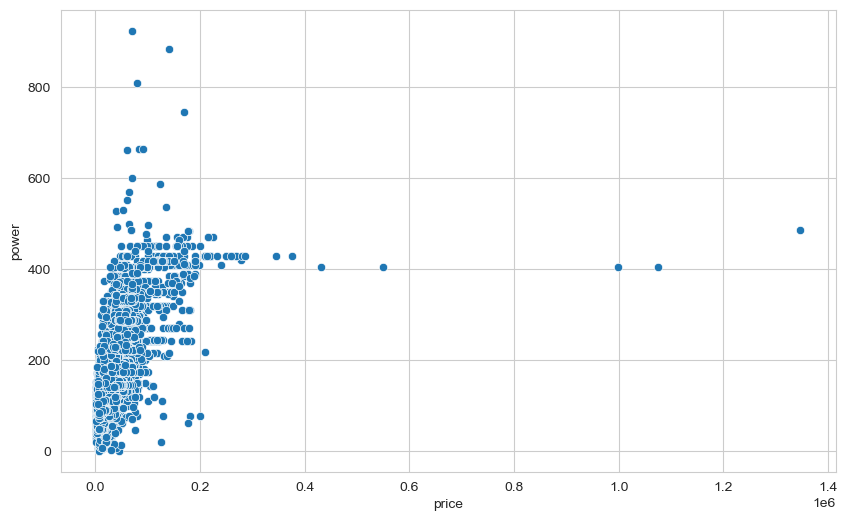

In [30]:
sns.scatterplot(data=df, x="price", y="power");

In [31]:
fordgt_index = df.loc[(df["make_model"] == "Ford GT") & (df["price"] > 400000)].index

In [32]:
df.drop(fordgt_index, axis=0, inplace=True)

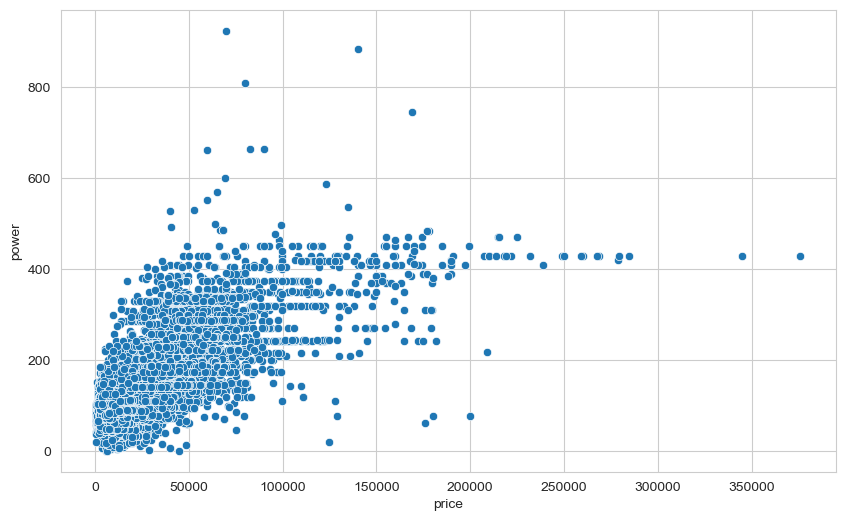

In [33]:
sns.scatterplot(data=df, x="price", y="power");

In [34]:
df.price.describe()

count    24297.00
mean     23249.97
std      20471.49
min        490.00
25%      11900.00
50%      18500.00
75%      28200.00
max     375900.00
Name: price, dtype: float64

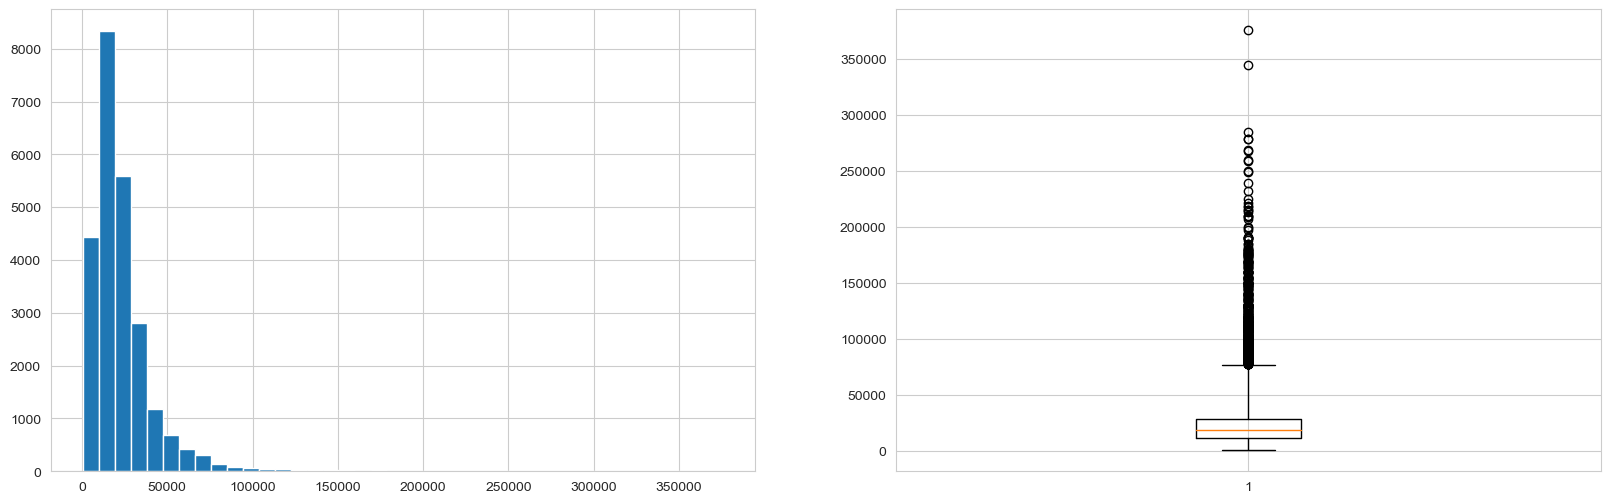

In [35]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=40)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [36]:
# Let's determine the First & Third Quantile and Inter Quantile Range 
# so we can calculate lowest and highest boundries of fence to drop extreme values

print("Number of rows before dropping outliers:", len(df))
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3-q1  # Interquartile range

fence_low  = q1-1.5*iqr
fence_high = q3+2.5*iqr

df = df.loc[(df["price"] > fence_low) & (df["price"] < fence_high)]
df.reset_index(drop=True, inplace=True)
print("Number of rows after dropping outliers:", len(df))

Number of rows before dropping outliers: 24297
Number of rows after dropping outliers: 23561


In [37]:
df.price.describe()

count   23561.00
mean    20743.26
std     13103.43
min       490.00
25%     11599.00
50%     17990.00
75%     26990.00
max     68900.00
Name: price, dtype: float64

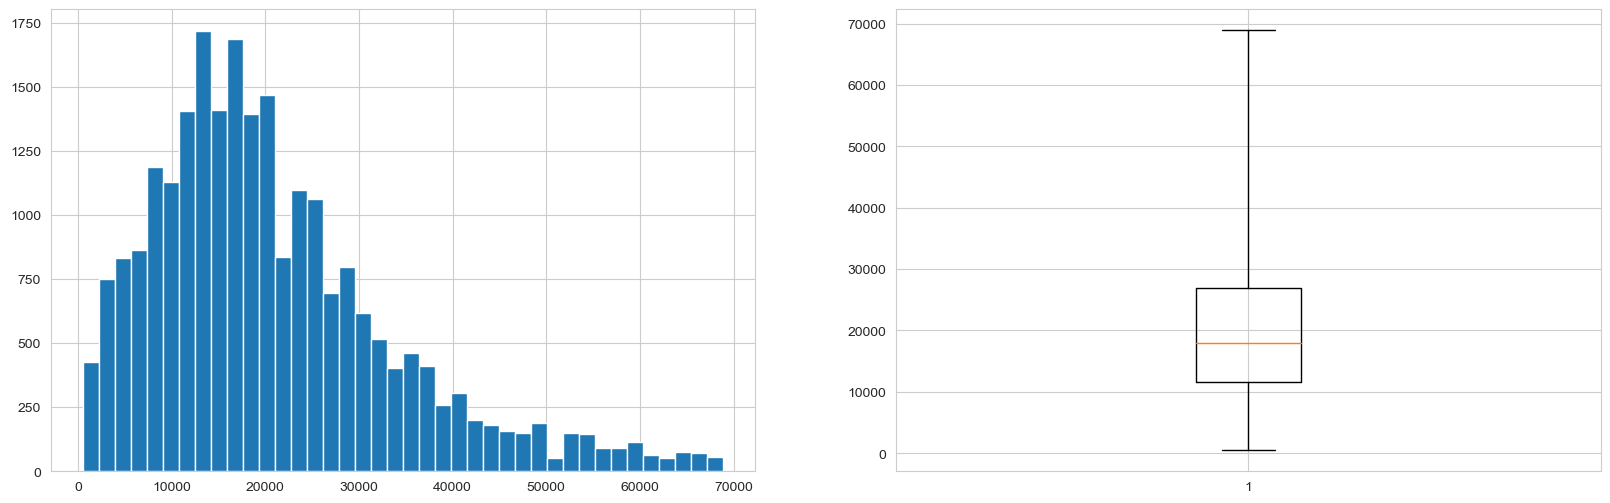

In [38]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=40)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

<Figure size 1600x600 with 0 Axes>

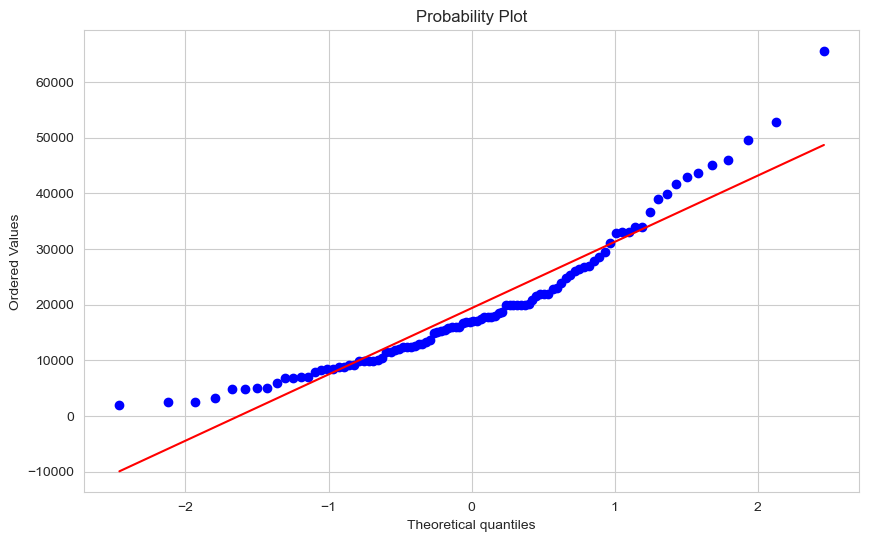

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(16, 6))

# Sample 100 observations from the 'price' column
my_data = df['price'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [40]:
df.drop("is_outlier", axis=1, inplace=True)

<a id="13"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> age </span></h1>
</div>

<div class="alert alert-block alert-warning">
<b>Operation : </b> 
Let's remove <span style="color:red"><b> the outlier values</b></span> from the "first_registration" column.
</div>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [41]:
df.shape

(23561, 31)

In [42]:
df.age.value_counts()

age
3.00      3029
4.00      2707
0.00      2438
1.00      2427
2.00      2078
5.00      1976
6.00      1234
7.00       942
8.00       747
9.00       615
10.00      591
11.00      569
12.00      478
15.00      387
14.00      368
13.00      367
16.00      354
17.00      270
18.00      219
19.00      176
21.00      157
20.00      155
22.00      129
23.00      117
28.00       79
25.00       75
27.00       74
24.00       73
26.00       67
30.00       57
31.00       53
29.00       50
32.00       49
56.00       34
34.00       28
55.00       26
57.00       26
49.00       26
35.00       23
50.00       21
36.00       20
33.00       19
37.00       18
44.00       18
54.00       17
53.00       16
52.00       15
51.00       14
43.00       13
39.00       13
47.00       12
46.00       10
45.00       10
38.00        9
40.00        8
41.00        8
48.00        8
58.00        6
42.00        5
59.00        5
67.00        4
60.00        4
61.00        4
65.00        3
62.00        2
63.00        2
64.00 

In [43]:
display(df.age.describe())

# Differences between intervals
diff1 = df.age.describe()['mean'] - df.age.describe()['std']
diff2 = df.age.describe()['25%'] - df.age.describe()['min']
diff3 = df.age.describe()['max'] - df.age.describe()['75%']

print(f"The difference between the mean value ({df.price.describe()['mean']:.2f}) and the standard deviation ({df.price.describe()['std']:.2f}) is {diff1:.2f}.")
print(f"The difference between the 25th percentile ({df.price.describe()['25%']:.2f}) and the minimum value ({df.price.describe()['min']:.2f}) is {diff2:.2f}.")
print(f"The difference between the 75th percentile ({df.price.describe()['75%']:.2f}) and the maximum value ({df.price.describe()['max']:.2f}) is {diff3:.2f}.")

count   23561.00
mean        6.89
std         8.45
min         0.00
25%         2.00
50%         4.00
75%         9.00
max       122.00
Name: age, dtype: float64

The difference between the mean value (20743.26) and the standard deviation (13103.43) is -1.56.
The difference between the 25th percentile (11599.00) and the minimum value (490.00) is 2.00.
The difference between the 75th percentile (26990.00) and the maximum value (68900.00) is 113.00.


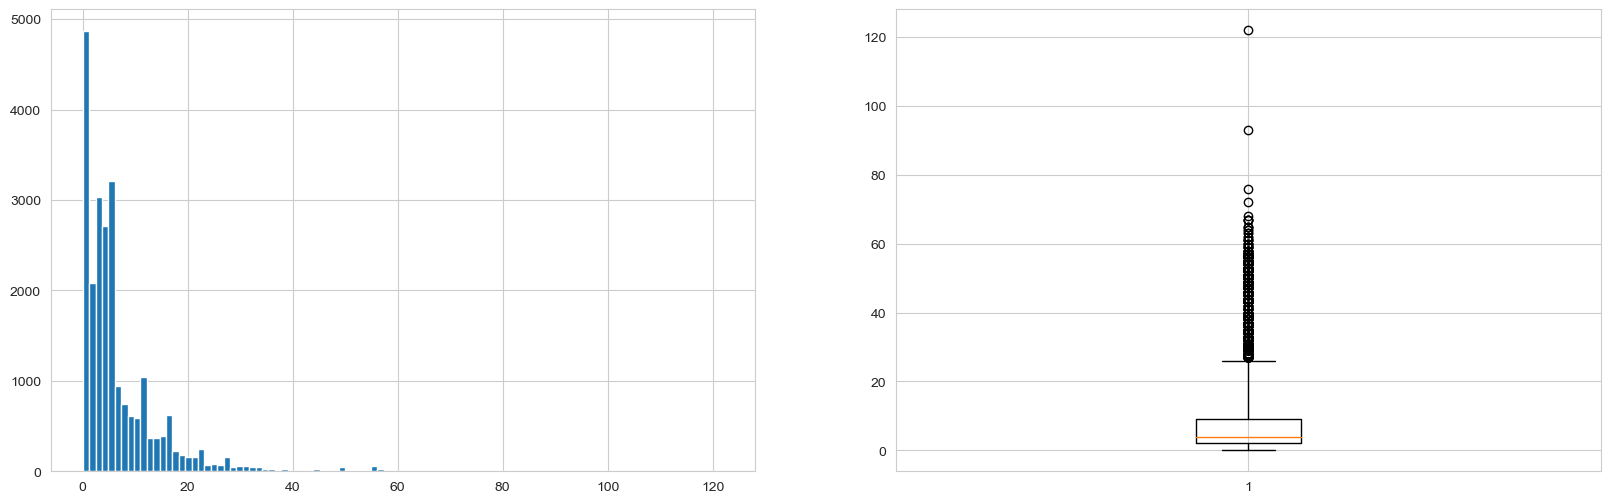

In [44]:
# Let's check how the observations in "age" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [45]:
# Let's examine the first lowest 20 observation in "age" to see if there have been some extreme values away from others

df.sort_values(by=["age"], ascending=True)["age"].tail(20)

12390    61.00
22339    61.00
22401    62.00
9207     62.00
12388    63.00
18679    63.00
18597    64.00
18607    64.00
19017    65.00
2555     65.00
18731    65.00
18715    67.00
18681    67.00
18628    67.00
18586    67.00
22432    68.00
2655     72.00
8256     76.00
18473    93.00
19197   122.00
Name: age, dtype: float64

In [46]:
# let's explore if there is any pattern among ""make_model", "body_type", "type", and "previous_owner" by "first_registration"

df.groupby(["make_model", "body_type", "type"]).age.describe()

count  mean  std  min  25%  50%  \
make_model   body_type        type                                              
Dacia Break  Station wagon    Demonstration    1.00  0.00  NaN 0.00 0.00 0.00   
Dacia Dokker Compact          Used             1.00  4.00  NaN 4.00 4.00 4.00   
             Off-Road/Pick-up Used             2.00  4.00 0.00 4.00 4.00 4.00   
             Sedan            Used             1.00  5.00  NaN 5.00 5.00 5.00   
             Station wagon    Used            43.00  4.37 1.85 0.00 3.00 4.00   
...                                             ...   ...  ...  ...  ...  ...   
Volvo XC90   Off-Road/Pick-up Demonstration    1.00  3.00  NaN 3.00 3.00 3.00   
                              Employee's car   1.00  1.00  NaN 1.00 1.00 1.00   
                              Used            72.00  5.29 3.41 1.00 3.00 5.00   
             Sedan            Used             2.00  3.50 0.71 3.00 3.25 3.50   
             Station wagon    Used             2.00  6.00 0.00 6.00 6.00 6.00   

                                              75%   max  
make_model   body_type        type                       
Dacia Break  Station wagon    Demonstration  0.00  0.00  
Dacia Dokker Compact          Used           4.00  4.00  
             Off-Road/Pick-up Used           4.00  4.00  
             Sedan            Used           5.00  5.00  
             Station wagon    Used           5.00  9.00  
...                                           ...   ...  
Volvo XC90   Off-Road/Pick-up Demonstration  3.00  3.00  
                              Employee's car 1.00  1.00  
                              Used           5.25 18.00  
             Sedan            Used           3.75  4.00  
             Station wagon    Used           6.00  6.00  

[1654 rows x 8 columns]

In [47]:
old_cars_index = df.loc[(df["age"] > 21)].index

In [48]:
df.loc[old_cars_index, ["make_model", "age","mileage",  "emission_class", "previous_owner", "body_type", "drivetrain", "engine_size", "fuel_type"]].sort_values(by=["age"], ascending=False)

,make_model,age,mileage,emission_class,previous_owner,body_type,drivetrain,engine_size,fuel_type
19197,Ford Bronco,122.00,10.00,Euro 6,1.00,Off-Road/Pick-up,4WD,2000.00,Benzin
18473,Ford M,93.00,65515.00,Euro 6,3.00,Convertible,Front,2043.00,Benzin
8256,Peugeot 504,76.00,180000.00,Euro 6,3.00,Sedan,Front,2000.00,Benzin
2655,Opel Cabrio,72.00,52466.00,Euro 6,3.00,Coupe,Rear,1500.00,Benzin
22432,Volvo PV544,68.00,99300.00,Euro 6,3.00,Coupe,Front,1584.00,Benzin
...,...,...,...,...,...,...,...,...,...
4819,Renault Megane,22.00,151773.00,Euro 4,2.00,Coupe,Front,1598.00,Benzin
4814,Renault Megane,22.00,212000.00,Euro 2,3.00,Convertible,Front,1598.00,Benzin
4774,Renault Megane,22.00,188567.00,Euro 2,1.00,Convertible,Front,1390.00,LPG/CNG
17415,Nissan Stagea,22.00,138000.00,Euro 6,3.00,Station wagon,4WD,2500.00,Benzin


In [49]:
df.loc[old_cars_index, 'make_model'].value_counts()

make_model
Fiat Coupe         151
Toyota Celica       95
Ford Mustang        82
Toyota MR 2         62
Opel Calibra        47
                  ... 
Renault Super 5      1
Renault R 9          1
Renault Twingo       1
Opel Senator         1
Volvo 244            1
Name: count, Length: 173, dtype: int64

In [50]:
len(df.loc[old_cars_index, ["make_model", "age"]])

1277

In [51]:
df.loc[old_cars_index, ["age"]].value_counts()

age   
22.00     129
23.00     117
28.00      79
25.00      75
27.00      74
24.00      73
26.00      67
30.00      57
31.00      53
29.00      50
32.00      49
56.00      34
34.00      28
57.00      26
55.00      26
49.00      26
35.00      23
50.00      21
36.00      20
33.00      19
37.00      18
44.00      18
54.00      17
53.00      16
52.00      15
51.00      14
39.00      13
43.00      13
47.00      12
46.00      10
45.00      10
38.00       9
48.00       8
41.00       8
40.00       8
58.00       6
42.00       5
59.00       5
67.00       4
61.00       4
60.00       4
65.00       3
62.00       2
63.00       2
64.00       2
68.00       1
72.00       1
76.00       1
93.00       1
122.00      1
Name: count, dtype: int64

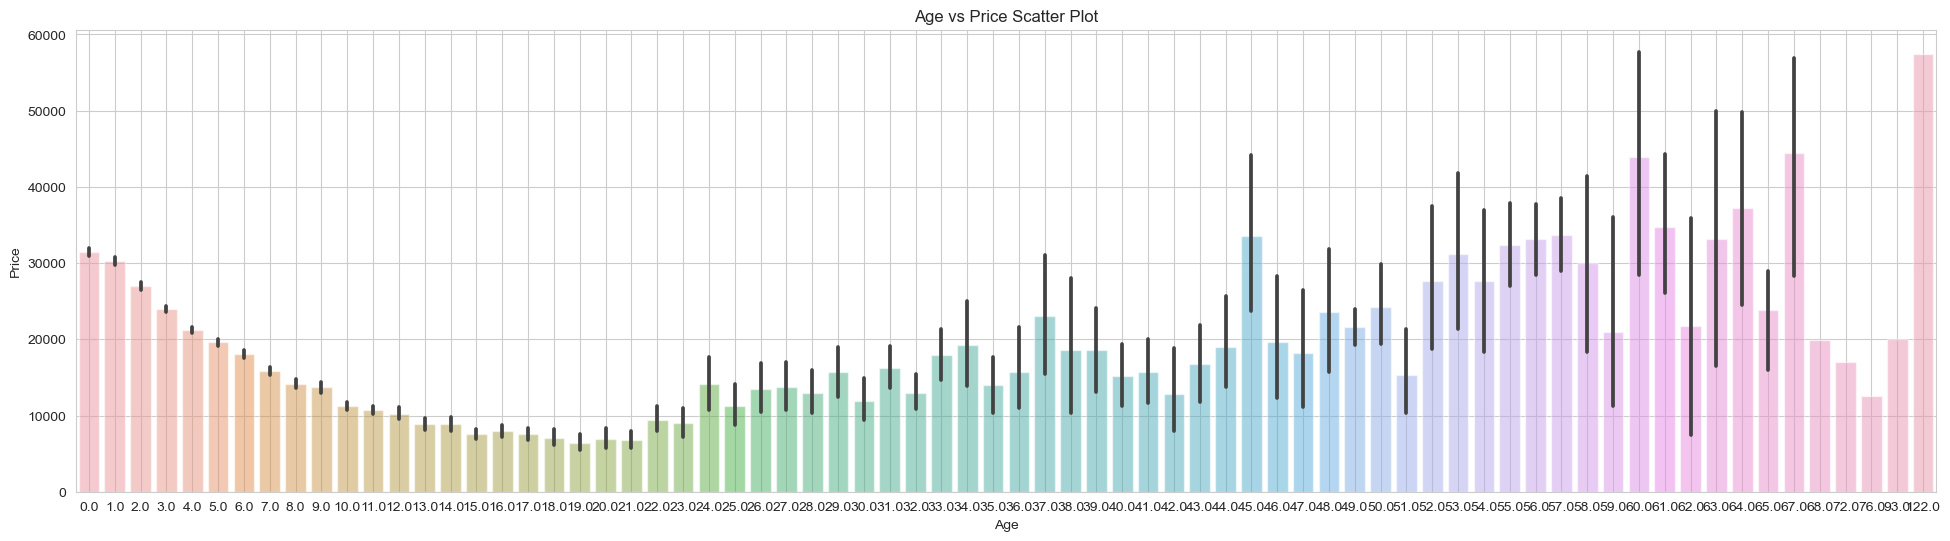

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot oluşturma
plt.figure(figsize=(24, 6))
sns.barplot(x="age", y="price", data=df, alpha=0.5)
plt.title("Age vs Price Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Price")
plt.grid(True)
plt.show()

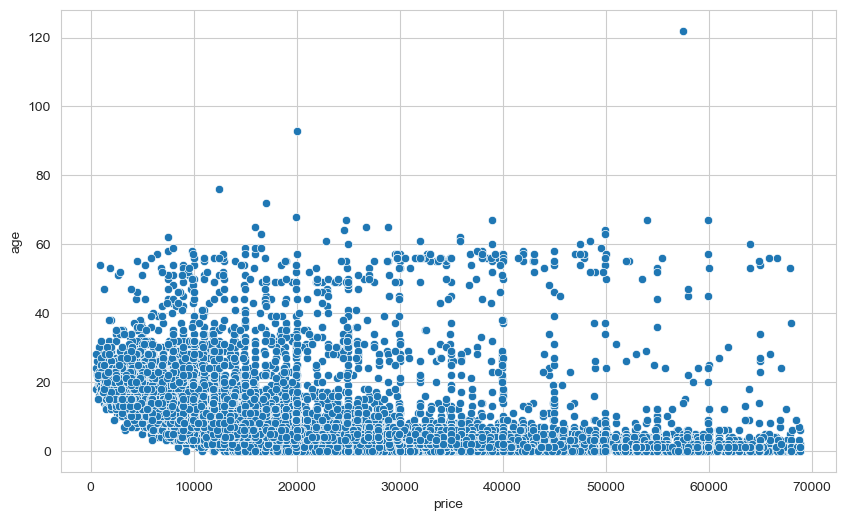

In [53]:
sns.scatterplot(data=df, x="price", y="age");

In [54]:
print(df.shape)
df.drop(old_cars_index, axis=0, inplace=True)
print(df.shape)

(23561, 31)
(22284, 31)


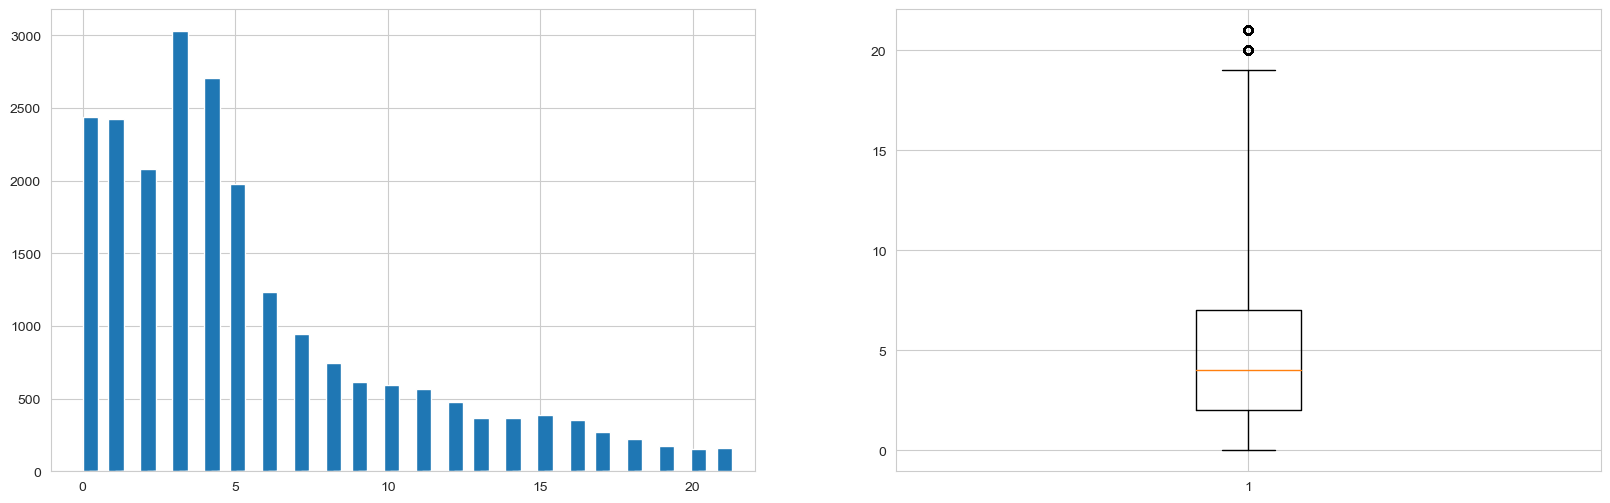

In [55]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100, width=0.5)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

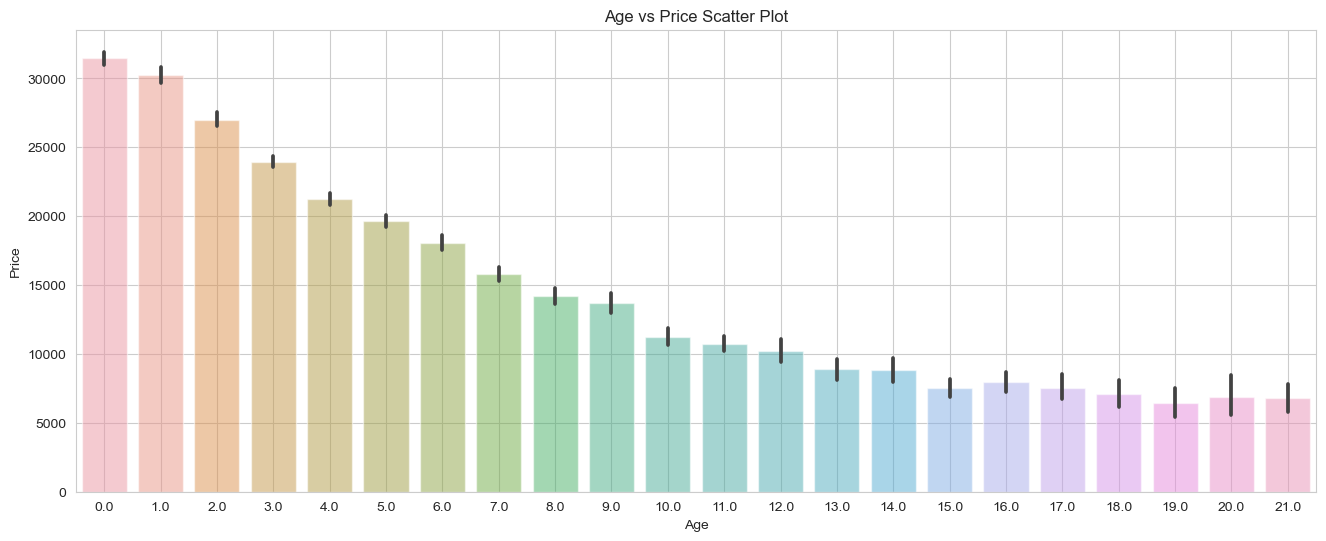

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot oluşturma
plt.figure(figsize=(16, 6))
sns.barplot(x="age", y="price", data=df, alpha=0.5)
plt.title("Age vs Price Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Price")
plt.grid(True)
plt.show()

<Figure size 2000x600 with 0 Axes>

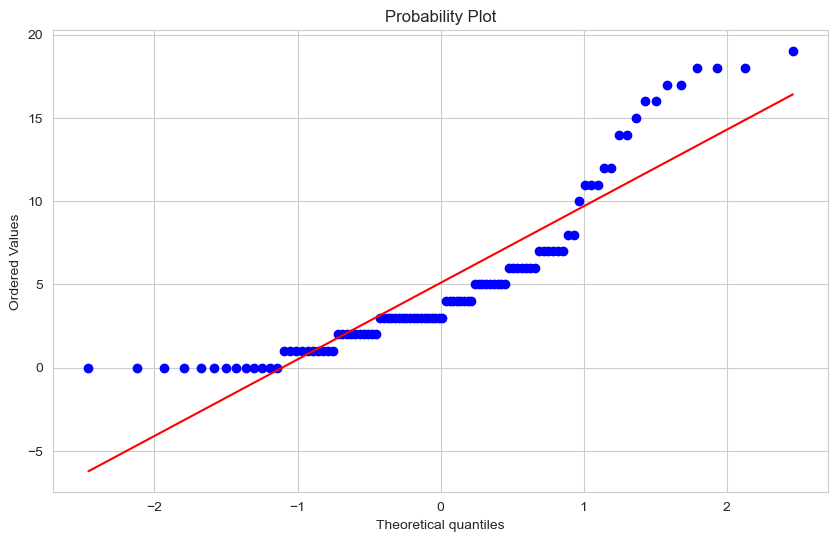

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(20, 6))

# Sample 50 observations from the 'cons_avg' column
my_data = df['age'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

<a id="13"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> fuel_consumption_comb </span></h1>
</div>

<div class="alert alert-block alert-warning">
<b>Operation : </b> 
Let's remove <span style="color:red"><b> the outlier values</b></span> from the "first_registration" column.
</div>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [58]:
df.fuel_consumption_comb.value_counts()

fuel_consumption_comb
4.90     1040
4.10      748
4.80      739
5.00      722
4.70      713
         ... 
16.00       1
6.05        1
13.20       1
5.70        1
2.70        1
Name: count, Length: 152, dtype: int64

In [59]:
# Differences between intervals
display(df.fuel_consumption_comb.describe())

diff1 = df.fuel_consumption_comb.describe()['mean'] - df.fuel_consumption_comb.describe()['std']
diff2 = df.fuel_consumption_comb.describe()['25%'] - df.fuel_consumption_comb.describe()['min']
diff3 = df.fuel_consumption_comb.describe()['max'] - df.fuel_consumption_comb.describe()['75%']

print(f"The difference between the mean value ({df.fuel_consumption_comb.describe()['mean']:.2f}) and the standard deviation ({df.fuel_consumption_comb.describe()['std']:.2f}) is {diff1:.2f}.")
print(f"The difference between the 25th percentile ({df.fuel_consumption_comb.describe()['25%']:.2f}) and the minimum value ({df.fuel_consumption_comb.describe()['min']:.2f}) is {diff2:.2f}.")
print(f"The difference between the 75th percentile ({df.fuel_consumption_comb.describe()['75%']:.2f}) and the maximum value ({df.fuel_consumption_comb.describe()['max']:.2f}) is {diff3:.2f}.")

count   22284.00
mean        5.63
std         1.94
min         0.60
25%         4.40
50%         5.20
75%         6.40
max        16.50
Name: fuel_consumption_comb, dtype: float64

The difference between the mean value (5.63) and the standard deviation (1.94) is 3.69.
The difference between the 25th percentile (4.40) and the minimum value (0.60) is 3.80.
The difference between the 75th percentile (6.40) and the maximum value (16.50) is 10.10.


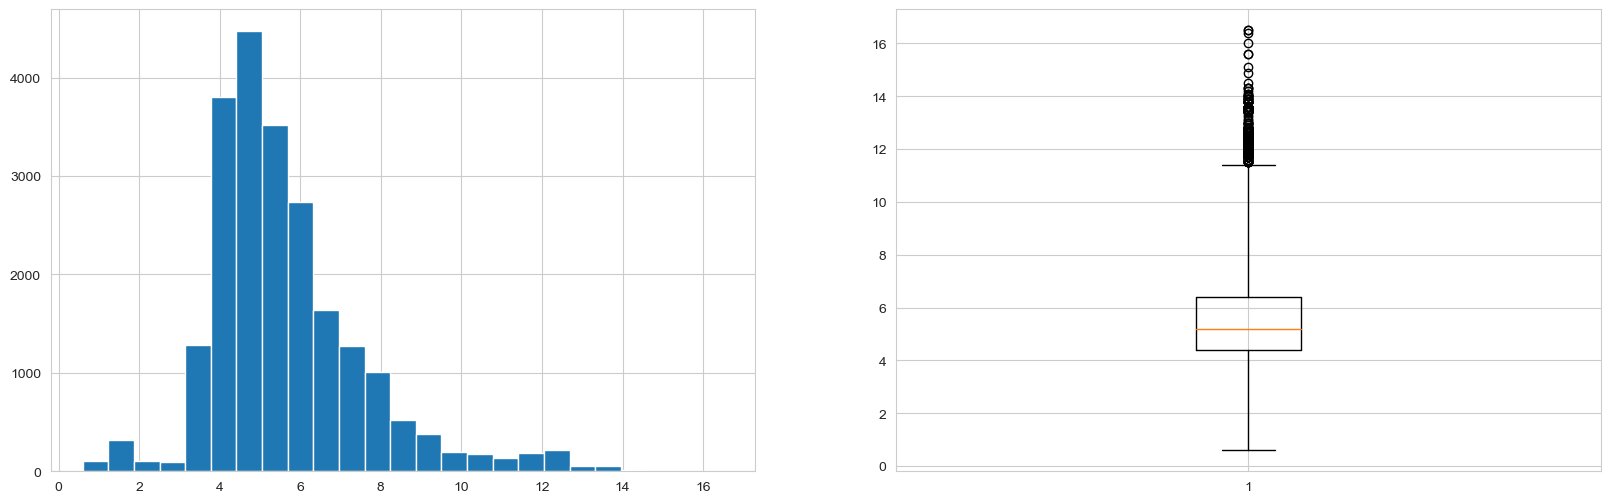

In [60]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.fuel_consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.fuel_consumption_comb, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [61]:
def box_plot_column(df, column):
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df[column])
    # Calculate whisker bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    # Annotate the plot with whisker bounds
    plt.text(0.5, lower_whisker, f'Lower Whisker: {lower_whisker:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue')
    plt.text(0.5, upper_whisker, f'Upper Whisker: {upper_whisker:.2f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='blue')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

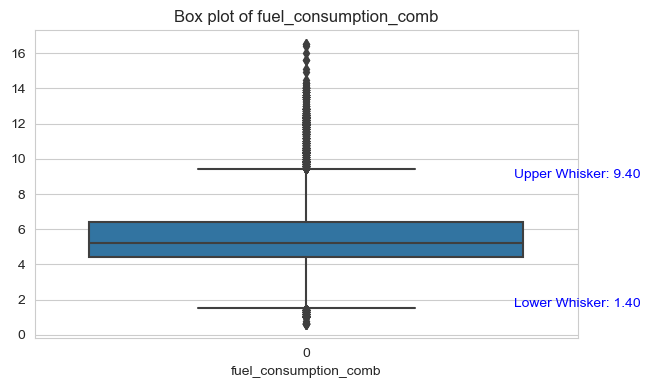

In [62]:
box_plot_column(df, 'fuel_consumption_comb')

In [63]:
# let's explore if there is any pattern among ""make_model", "body_type", "fuel_type", and "fuel_consumption" by "mileage"

df.groupby(["make_model", "body_type", "fuel_type", "fuel_consumption_comb"]).mileage.describe()

count  \
make_model   body_type        fuel_type fuel_consumption_comb          
Dacia Break  Station wagon    Benzin    4.50                    1.00   
Dacia Dokker Compact          Diesel    4.20                    1.00   
             Off-Road/Pick-up Benzin    6.30                    1.00   
                              LPG/CNG   6.30                    1.00   
             Sedan            Diesel    4.20                    1.00   
...                                                              ...   
Volvo XC90   Off-Road/Pick-up Diesel    9.10                    1.00   
                              Electric  2.10                    1.00   
             Sedan            Diesel    6.70                    2.00   
             Station wagon    Diesel    5.70                    1.00   
                                        5.80                    1.00   

                                                                   mean  \
make_model   body_type        fuel_type fuel_consumption_comb             
Dacia Break  Station wagon    Benzin    4.50                     999.00   
Dacia Dokker Compact          Diesel    4.20                  141100.00   
             Off-Road/Pick-up Benzin    6.30                  100000.00   
                              LPG/CNG   6.30                  100000.00   
             Sedan            Diesel    4.20                  149000.00   
...                                                                 ...   
Volvo XC90   Off-Road/Pick-up Diesel    9.10                  237102.00   
                              Electric  2.10                   68299.00   
             Sedan            Diesel    6.70                   77824.50   
             Station wagon    Diesel    5.70                  150000.00   
                                        5.80                  143550.00   

                                                                   std  \
make_model   body_type        fuel_type fuel_consumption_comb            
Dacia Break  Station wagon    Benzin    4.50                       NaN   
Dacia Dokker Compact          Diesel    4.20                       NaN   
             Off-Road/Pick-up Benzin    6.30                       NaN   
                              LPG/CNG   6.30                       NaN   
             Sedan            Diesel    4.20                       NaN   
...                                                                ...   
Volvo XC90   Off-Road/Pick-up Diesel    9.10                       NaN   
                              Electric  2.10                       NaN   
             Sedan            Diesel    6.70                  12564.58   
             Station wagon    Diesel    5.70                       NaN   
                                        5.80                       NaN   

                                                                    min  \
make_model   body_type        fuel_type fuel_consumption_comb             
Dacia Break  Station wagon    Benzin    4.50                     999.00   
Dacia Dokker Compact          Diesel    4.20                  141100.00   
             Off-Road/Pick-up Benzin    6.30                  100000.00   
                              LPG/CNG   6.30                  100000.00   
             Sedan            Diesel    4.20                  149000.00   
...                                                                 ...   
Volvo XC90   Off-Road/Pick-up Diesel    9.10                  237102.00   
                              Electric  2.10                   68299.00   
             Sedan            Diesel    6.70                   68940.00   
             Station wagon    Diesel    5.70                  150000.00   
                                        5.80                  143550.00   

                                                                    25%  \
make_model   body_type        fuel_type fuel_consumption_comb             
Dacia Break  Station wagon    Benzin    4.50                 

In [64]:
df.loc[df["fuel_consumption_comb"] >= 10][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type",  "fuel_consumption_comb"]]\
                                 .sort_values(by=["fuel_consumption_comb"], ascending=False)

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type,fuel_consumption_comb
944,Mercedes Benz ML 63 AMG,15.00,Off-Road/Pick-up,Automatic,4WD,7.00,6208.00,Benzin,16.50
915,Mercedes Benz ML 63 AMG,12.00,Off-Road/Pick-up,Automatic,4WD,7.00,6208.00,Benzin,16.50
695,Mercedes Benz CLK 500,20.00,Coupe,Automatic,Rear,5.00,4966.00,Benzin,16.40
6757,Peugeot 307,18.00,Convertible,Manual,Front,5.00,1997.00,Benzin,16.00
15664,Toyota Land Cruiser,0.00,Off-Road/Pick-up,Manual,4WD,6.00,3956.00,Benzin,15.60
...,...,...,...,...,...,...,...,...,...
22171,Volvo C70,20.00,Convertible,Automatic,Front,5.00,2435.00,Benzin,10.00
1569,Mercedes Benz S 350,13.00,Sedan,Automatic,Rear,7.00,3498.00,Benzin,10.00
6995,Peugeot 406,21.00,Coupe,Manual,Front,5.00,2946.00,Benzin,10.00
4948,Renault Laguna,13.00,Coupe,Automatic,Front,6.00,3498.00,Benzin,10.00


### 📝 Domain Knowledge About ``Average Fuel Consumptions`` of some Vehicles:

- ``Mercedes-Benz A 180``'s Average Fuel Consumption value is **5.7 L/100km**
- ``Nissan Qashqai``'s Average Fuel Consumption value is **6.2 L/100 km**
- ``Ford Focus``'s co2 Average Fuel Consumption value is **4.6 to 6.7 L/100 km**
- ``Mercedes-Benz E 200``'s Average Fuel Consumption value is **7.1 to 8 L/100 km**
- ``Renault Megane``'s Average Fuel Consumption value is **4.4 to 6.8 L/100 km**
- ``Toyota Yaris``'s Average Fuel Consumption value is **5.4 to 6.9 L/100 km**
- ``Hyundai KONA``'s Average Fuel Consumption value is **4 to 5.8 L/100 km**
- ``Mercedes-Benz GLC 63 AMG``'s Average Fuel Consumption value is **9 to 16 L/100km**
- ``Ford Mustang``'s Average Fuel Consumption value is **12 to 16.2 L/100 km**
- ``Nissan GT-R``'s co2 Average Fuel Consumption value is **11.8 to 19.4 L/100 km**
- ``Nissan Skyline``'s Average Fuel Consumption value is **16 to 17.7 L/100 km**
- ``Nissan 370Z``'s Average Fuel Consumption value is **11.2 to 18.1 L/100 km**
- ``Peugeot 205``'s Average Fuel Consumption value is **6.3 to 9.9 L/100 km**
- ``Volvo C70``'s Average Fuel Consumption value is **8.9 to 9.8 L/100 km**
- ``Renault Alpine A310``'s Average Fuel Consumption value is **8.7 to 16.6 L/100 km**
- ``Hyundai Genesis``'s Average Fuel Consumption value is **9.4 to 14.4 L/100 km**
- ``Fiat Coupe``'s Average Fuel Consumption value is **8 to 14 L/100 km**
- ``Ford Thunderbird``'s Average Fuel Consumption value is **13.5 to 19 L/100 km**

**To get more information in detail about Average Car Fuel Consumption of each make and model, you can visit 🧐 [car-emissions.com](https://www.car-emissions.com/), 🧐 [incardoc.com](https://incardoc.com/en-us/), and 🧐 [carsfuelconsumption.com](http://carsfuelconsumption.com/)**

**Considering our domain knowledge, it can be concluded that the max value equal to/greater than 20 is anomaly.**

In [65]:
df.loc[df["engine_size"]== 0][["make_model","fuel_type", "age", "drivetrain", "gears", "engine_size", "fuel_consumption_comb"]]\
                                 .sort_values(by=["fuel_consumption_comb"], ascending=False)

,make_model,fuel_type,age,drivetrain,gears,engine_size,fuel_consumption_comb
18868,Ford Mustang Mach-E,Electric,0.00,4WD,1.00,0.00,11.80
20836,Hyundai TUCSON,Benzin,4.00,4WD,7.00,0.00,7.60
3760,Opel Astra,Benzin,0.00,Front,6.00,0.00,7.30
9048,Fiat 500e,Electric,0.00,Front,1.00,0.00,7.00
9052,Fiat 500e,Electric,0.00,Front,1.00,0.00,7.00
...,...,...,...,...,...,...,...
16369,Nissan Leaf,Electric,2.00,Front,1.00,0.00,4.10
21546,Hyundai IONIQ,Other,4.00,Front,1.00,0.00,3.90
13351,Skoda Enyaq,Electric,1.00,Rear,1.00,0.00,3.90
16141,Toyota Mirai,Other,1.00,Rear,1.00,0.00,3.90


In [66]:
df.fuel_type.value_counts()

fuel_type
Benzin      14347
Diesel       7002
Electric      361
LPG/CNG       328
Other         246
Name: count, dtype: int64

In [67]:
df.loc[df["engine_size"]== 0]["fuel_type"].value_counts()

fuel_type
Electric    219
Benzin       25
Other         8
Diesel        3
Name: count, dtype: int64

In [68]:
df.loc[((df["fuel_consumption_comb"] < 4) & (df["fuel_type"] != "Electric"))][["make_model","fuel_type", "age", "drivetrain", "gears", "engine_size", "fuel_consumption_comb"]]\
                                 .sort_values(by=["fuel_consumption_comb"], ascending=False)

,make_model,fuel_type,age,drivetrain,gears,engine_size,fuel_consumption_comb
10360,Fiat 500,Benzin,0.00,Front,6.00,999.00,3.90
14856,Toyota Corolla,Benzin,3.00,Front,6.00,1987.00,3.90
14896,Toyota Yaris,Diesel,5.00,Front,1.00,1497.00,3.90
14902,Toyota Auris,Benzin,4.00,Front,1.00,1798.00,3.90
14921,Toyota Corolla,Benzin,2.00,Front,1.00,1987.00,3.90
...,...,...,...,...,...,...,...
1785,Mercedes Benz C 300,Benzin,0.00,Rear,9.00,1999.00,0.60
1298,Mercedes Benz C 300,Benzin,0.00,Rear,9.00,1999.00,0.60
1793,Mercedes Benz C 300,Benzin,0.00,Rear,9.00,1999.00,0.60
1369,Mercedes Benz C 300,Benzin,0.00,Rear,9.00,1999.00,0.60


In [69]:
df.loc[(df["fuel_consumption_comb"] < 4) & (df["fuel_type"] != "Electric"), "fuel_consumption_comb"] = np.nan

In [70]:
groups = [
    ["make_model", "body_type", "drivetrain", "power"],
    ["make_model", "body_type", "drivetrain", "engine_size"],
    ["make_model", "body_type", "drivetrain", "cylinders"]
]

# Yukarıdaki her bir grup için fuel_consumption_comb sütunundaki NaN değerleri doldur
for group in groups:
    df['fuel_consumption_comb'] = df['fuel_consumption_comb'].fillna(
        df.groupby(group)['fuel_consumption_comb'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    print(df['fuel_consumption_comb'].isnull().sum())

973
346
137


In [71]:
df = df.dropna(subset=['fuel_consumption_comb'])

In [72]:
df.shape

(22147, 31)

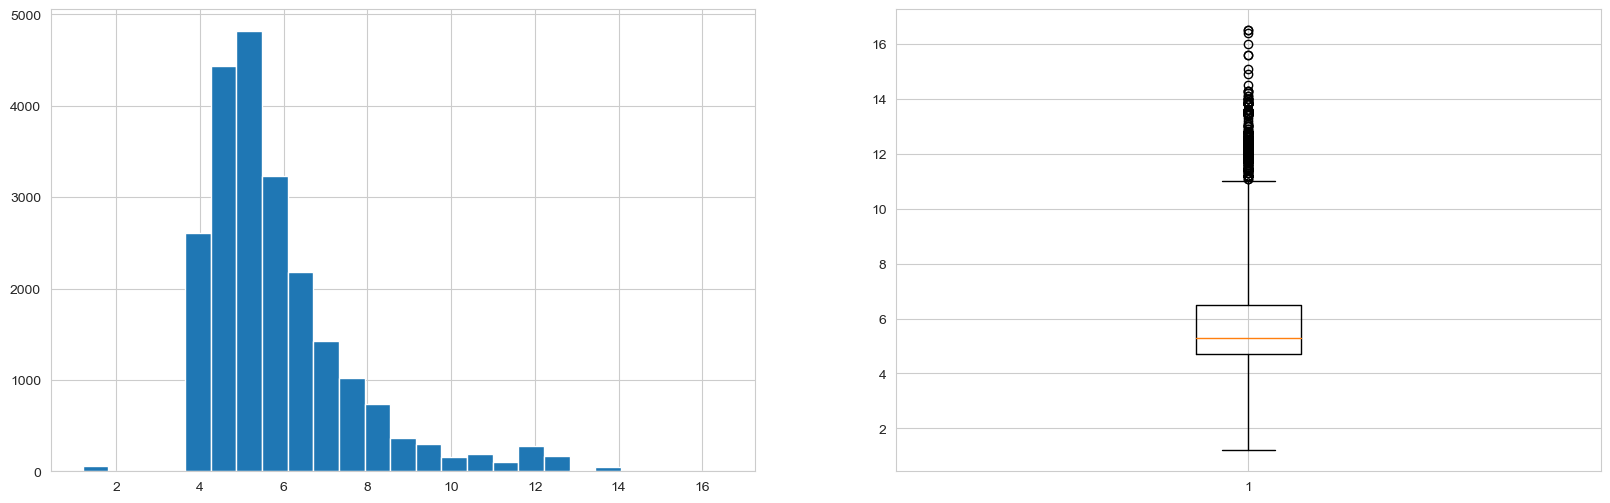

In [73]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.fuel_consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.fuel_consumption_comb, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

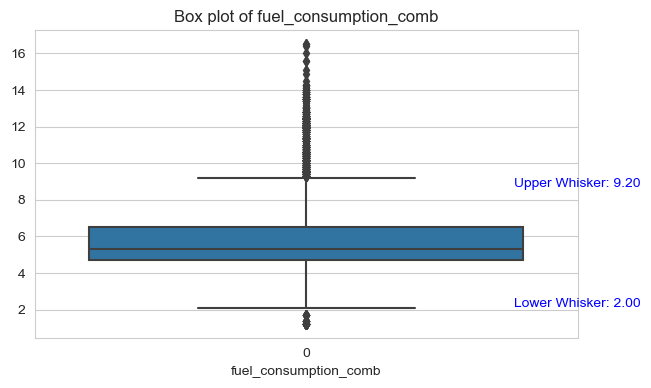

In [74]:
box_plot_column(df, 'fuel_consumption_comb')

In [75]:
df = df.drop(df[df['fuel_consumption_comb'] > 14].index)

In [76]:
df = df.drop(df[df['fuel_consumption_comb'] < 0.5].index)

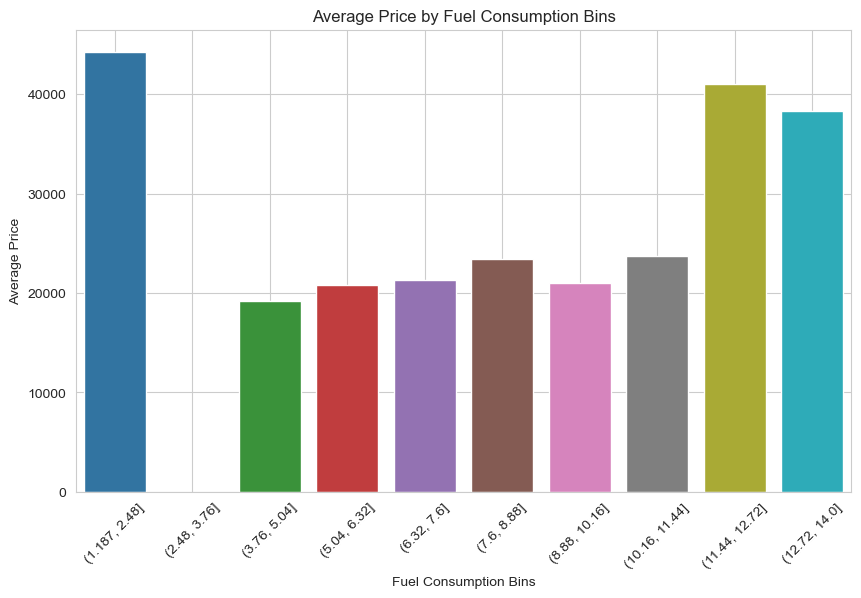

In [77]:
# Yakıt tüketimini 10 parçaya bölmek
df['fuel_consumption_bin'] = pd.cut(df['fuel_consumption_comb'], bins=10)
# Her bir parça için ortalama fiyatları hesaplamak
price_mean_by_bin = df.groupby('fuel_consumption_bin')['price'].mean().reset_index()
# Çubuk grafik çizmek
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_consumption_bin', y='price', data=price_mean_by_bin)
plt.title('Average Price by Fuel Consumption Bins')
plt.xlabel('Fuel Consumption Bins')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 2000x600 with 0 Axes>

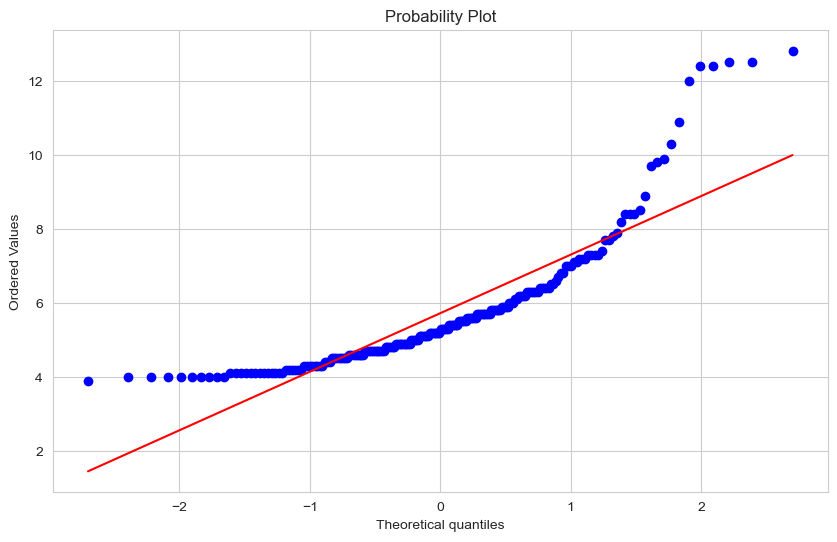

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(20, 6))

# Sample 50 observations from the 'cons_avg' column
my_data = df['fuel_consumption_comb'].sample(200)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

<a id="13"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> power </span></h1>
</div>

<div class="alert alert-block alert-warning">
<b>Operation : </b> 
Let's remove <span style="color:red"><b> the outlier values</b></span> from the "power" column.
</div>
<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [79]:
df.power.value_counts()

power
110.00    1727
96.00     1246
81.00      977
85.00      891
66.00      870
          ... 
342.00       1
303.00       1
493.00       1
372.00       1
237.00       1
Name: count, Length: 286, dtype: int64

In [80]:
# Differences between intervals
display(df.power.describe())

diff1 = df.power.describe()['mean'] - df.power.describe()['std']
diff2 = df.power.describe()['25%'] - df.power.describe()['min']
diff3 = df.power.describe()['max'] - df.power.describe()['75%']

print(f"The difference between the mean value ({df.power.describe()['mean']:.2f}) and the standard deviation ({df.power.describe()['std']:.2f}) is {diff1:.2f}.")
print(f"The difference between the 25th percentile ({df.power.describe()['25%']:.2f}) and the minimum value ({df.power.describe()['min']:.2f}) is {diff2:.2f}.")
print(f"The difference between the 75th percentile ({df.power.describe()['75%']:.2f}) and the maximum value ({df.power.describe()['max']:.2f}) is {diff3:.2f}.")

count   22132.00
mean      113.11
std        57.62
min         1.00
25%        77.00
50%        97.00
75%       130.00
max       662.00
Name: power, dtype: float64

The difference between the mean value (113.11) and the standard deviation (57.62) is 55.49.
The difference between the 25th percentile (77.00) and the minimum value (1.00) is 76.00.
The difference between the 75th percentile (130.00) and the maximum value (662.00) is 532.00.


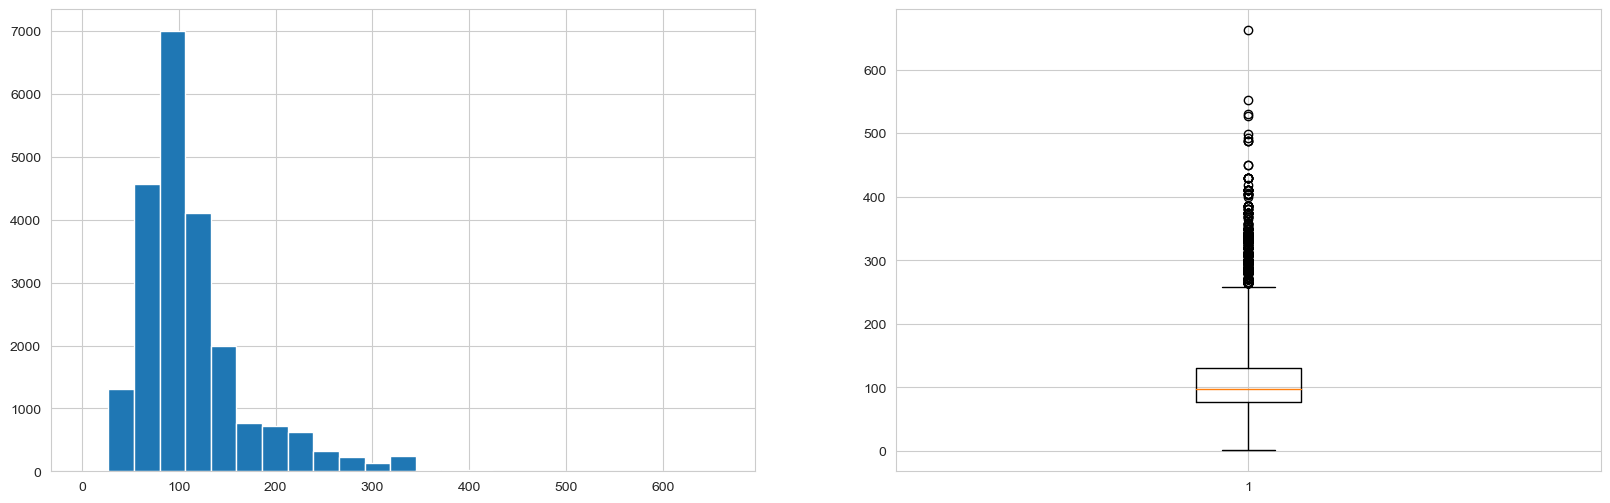

In [81]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.power, bins = 25)

plt.subplot(122)
plt.boxplot(df.power, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

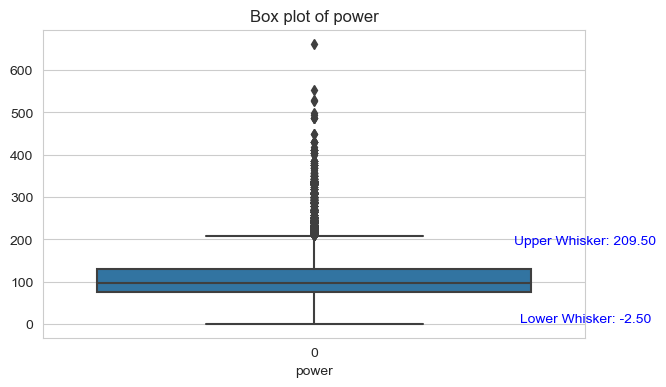

In [82]:
box_plot_column(df, 'power')

In [83]:
# let's explore if there is any pattern among ""make_model", "body_type", and "fuel_type" by "power_kW"

df.groupby(["make_model", "body_type", "fuel_type"]).power.describe()

count   mean   std    min    25%  \
make_model   body_type        fuel_type                                     
Dacia Break  Station wagon    Benzin      1.00 110.00   NaN 110.00 110.00   
Dacia Dokker Compact          Diesel      1.00  66.00   NaN  66.00  66.00   
             Off-Road/Pick-up Benzin      1.00  75.00   NaN  75.00  75.00   
                              LPG/CNG     1.00  75.00   NaN  75.00  75.00   
             Sedan            Diesel      1.00  55.00   NaN  55.00  55.00   
...                                        ...    ...   ...    ...    ...   
Volvo XC90   Off-Road/Pick-up Benzin     15.00 229.53 30.82 184.00 223.00   
                              Diesel     58.00 172.59 32.93 120.00 168.50   
                              Electric    1.00 294.00   NaN 294.00 294.00   
             Sedan            Diesel      2.00 173.00  0.00 173.00 173.00   
             Station wagon    Diesel      2.00 165.00  0.00 165.00 165.00   

                                           50%    75%    max  
make_model   body_type        fuel_type                       
Dacia Break  Station wagon    Benzin    110.00 110.00 110.00  
Dacia Dokker Compact          Diesel     66.00  66.00  66.00  
             Off-Road/Pick-up Benzin     75.00  75.00  75.00  
                              LPG/CNG    75.00  75.00  75.00  
             Sedan            Diesel     55.00  55.00  55.00  
...                                        ...    ...    ...  
Volvo XC90   Off-Road/Pick-up Benzin    228.00 231.50 300.00  
                              Diesel    173.00 173.00 294.00  
                              Electric  294.00 294.00 294.00  
             Sedan            Diesel    173.00 173.00 173.00  
             Station wagon    Diesel    165.00 165.00 165.00  

[1488 rows x 8 columns]

In [84]:
df.sort_values(by=["power"], ascending=False)["power"].head(20)

18993   662.00
18884   552.00
18882   530.00
18598   527.00
18690   499.00
18642   493.00
18603   487.00
18997   487.00
18998   487.00
1241    450.00
1538    450.00
948     430.00
1787    430.00
1587    430.00
1217    430.00
1115    430.00
1532    430.00
911     430.00
18487   419.00
934     410.00
Name: power, dtype: float64

In [85]:
df["power"].sort_values().head(20)

4673     1.00
4422     1.00
19237    3.00
5355     4.00
5393     4.00
5004     4.00
4968     4.00
5138     4.00
21325    6.00
4787     7.00
5031     8.00
5153     8.00
5123     8.00
4389     9.00
5049    12.00
4091    12.00
4139    13.00
8504    17.00
14529   18.00
14482   18.00
Name: power, dtype: float64

In [86]:
df.groupby('fuel_type')['power'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel_type,,,,,,,,
Benzin,14248.00,118.21,66.47,1.00,74.00,99.00,135.00,662.00
Diesel,6972.00,105.73,33.02,3.00,82.00,100.00,125.00,309.00
Electric,361.00,88.83,51.80,1.00,51.00,83.00,110.00,300.00
LPG/CNG,317.00,78.98,27.40,44.00,66.00,74.00,88.00,307.00
Other,234.00,106.29,40.43,49.00,87.25,100.00,111.50,331.00


In [87]:
df.groupby(["make_model","body_type","fuel_type"]).power.describe()

count   mean   std    min    25%  \
make_model   body_type        fuel_type                                     
Dacia Break  Station wagon    Benzin      1.00 110.00   NaN 110.00 110.00   
Dacia Dokker Compact          Diesel      1.00  66.00   NaN  66.00  66.00   
             Off-Road/Pick-up Benzin      1.00  75.00   NaN  75.00  75.00   
                              LPG/CNG     1.00  75.00   NaN  75.00  75.00   
             Sedan            Diesel      1.00  55.00   NaN  55.00  55.00   
...                                        ...    ...   ...    ...    ...   
Volvo XC90   Off-Road/Pick-up Benzin     15.00 229.53 30.82 184.00 223.00   
                              Diesel     58.00 172.59 32.93 120.00 168.50   
                              Electric    1.00 294.00   NaN 294.00 294.00   
             Sedan            Diesel      2.00 173.00  0.00 173.00 173.00   
             Station wagon    Diesel      2.00 165.00  0.00 165.00 165.00   

                                           50%    75%    max  
make_model   body_type        fuel_type                       
Dacia Break  Station wagon    Benzin    110.00 110.00 110.00  
Dacia Dokker Compact          Diesel     66.00  66.00  66.00  
             Off-Road/Pick-up Benzin     75.00  75.00  75.00  
                              LPG/CNG    75.00  75.00  75.00  
             Sedan            Diesel     55.00  55.00  55.00  
...                                        ...    ...    ...  
Volvo XC90   Off-Road/Pick-up Benzin    228.00 231.50 300.00  
                              Diesel    173.00 173.00 294.00  
                              Electric  294.00 294.00 294.00  
             Sedan            Diesel    173.00 173.00 173.00  
             Station wagon    Diesel    165.00 165.00 165.00  

[1488 rows x 8 columns]

In [88]:
df[df["power"]<15][["make_model", "age", "body_type", "gearbox","cylinders", "drivetrain", "gears", "engine_size", "fuel_type","power"]].sort_values(by="power")

,make_model,age,body_type,gearbox,cylinders,drivetrain,gears,engine_size,fuel_type,power
4422,Renault Twizy,4.00,Compact,Automatic,4.00,Rear,7.00,1332.00,Benzin,1.00
4673,Renault Twizy,5.00,Convertible,Automatic,1.00,Front,1.00,1598.00,Electric,1.00
19237,Ford Kuga,1.00,Off-Road/Pick-up,Manual,4.00,Front,6.00,1500.00,Diesel,3.00
5393,Renault Twizy,6.00,Off-Road/Pick-up,Automatic,1.00,Rear,1.00,1598.00,Electric,4.00
5355,Renault Twizy,10.00,Off-Road/Pick-up,Automatic,1.00,Rear,1.00,1598.00,Electric,4.00
4968,Renault Twizy,10.00,Coupe,Automatic,1.00,Rear,1.00,1598.00,Electric,4.00
5004,Renault Twizy,3.00,Coupe,Automatic,1.00,Rear,1.00,1598.00,Electric,4.00
5138,Renault Twizy,2.00,Coupe,Automatic,1.00,Front,1.00,1598.00,Electric,4.00
21325,Hyundai i20,3.00,Station wagon,Manual,3.00,Front,5.00,998.00,Benzin,6.00
4787,Renault Megane,16.00,Convertible,Automatic,4.00,Front,6.00,1600.00,Benzin,7.00


In [89]:
df[df["power"]<30].make_model.value_counts()

make_model
Renault Twizy     12
Renault Megane     3
Dacia Spring       3
Fiat 500           2
Ford Kuga          1
Hyundai i20        1
Name: count, dtype: int64

In [90]:
df[df["power"]<50].fuel_type.value_counts()

fuel_type
Benzin      251
Electric     86
Diesel        8
LPG/CNG       3
Other         1
Name: count, dtype: int64

In [91]:
df[df["make_model"]=="Renault Twizy"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "power"]]

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type,power
4091,Renault Twizy,10.00,Compact,Automatic,Front,1.00,1598.00,Electric,12.00
4139,Renault Twizy,1.00,Compact,Automatic,Rear,1.00,1598.00,Electric,13.00
4195,Renault Twizy,6.00,Compact,Automatic,Rear,1.00,1598.00,Electric,59.00
4389,Renault Twizy,0.00,Compact,Automatic,Front,1.00,1598.00,Electric,9.00
4422,Renault Twizy,4.00,Compact,Automatic,Rear,7.00,1332.00,Benzin,1.00
4673,Renault Twizy,5.00,Convertible,Automatic,Front,1.00,1598.00,Electric,1.00
4968,Renault Twizy,10.00,Coupe,Automatic,Rear,1.00,1598.00,Electric,4.00
5004,Renault Twizy,3.00,Coupe,Automatic,Rear,1.00,1598.00,Electric,4.00
5031,Renault Twizy,7.00,Coupe,Automatic,Rear,1.00,1598.00,Electric,8.00
5123,Renault Twizy,8.00,Coupe,Automatic,Rear,1.00,1598.00,Electric,8.00


In [92]:
df[df["make_model"]=="Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "power"]]

,make_model,age,body_type,gearbox,drivetrain,gears,engine_size,fuel_type,power
4045,Renault Megane,1.00,Compact,Manual,Front,6.00,1332.00,Benzin,103.00
4048,Renault Megane,1.00,Compact,Automatic,Front,6.00,1798.00,Benzin,221.00
4051,Renault Megane,4.00,Compact,Automatic,Front,6.00,1500.00,Diesel,81.00
4053,Renault Megane,7.00,Compact,Manual,Front,6.00,1461.00,Diesel,81.00
4054,Renault Megane,8.00,Compact,Manual,Front,6.00,1461.00,Diesel,81.00
...,...,...,...,...,...,...,...,...,...
6221,Renault Megane,0.00,Sedan,Automatic,Front,1.00,1998.00,Diesel,160.00
6224,Renault Megane,10.00,Sedan,Manual,Front,6.00,1200.00,Benzin,85.00
6226,Renault Megane,2.00,Sedan,Manual,Front,6.00,1461.00,Diesel,85.00
6227,Renault Megane,2.00,Sedan,Automatic,Front,7.00,1461.00,Diesel,85.00


In [93]:
df.loc[(df["power"] < 10) & (df["fuel_type"] == "Electric"), "power"] = np.nan

In [94]:
groups = [
    ["make_model", "body_type", "drivetrain"],
    ["make_model", "body_type"],
    ["make_model"]
]

# Yukarıdaki her bir grup için power sütunundaki NaN değerleri doldur
for group in groups:
    df['power'] = df['power'].fillna(
        df.groupby(group)['power'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    print(df['power'].isnull().sum())

8
8
0


In [95]:
df.loc[(df["power"] < 30) & (df["fuel_type"] != "Electric"), "power"] = np.nan

In [96]:
groups = [
    ["make_model", "body_type", "drivetrain"],
    ["make_model", "body_type"],
    ["make_model"]
]

# Yukarıdaki her bir grup için power sütunundaki NaN değerleri doldur
for group in groups:
    df['power'] = df['power'].fillna(
        df.groupby(group)['power'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    print(df['power'].isnull().sum())

0
0
0


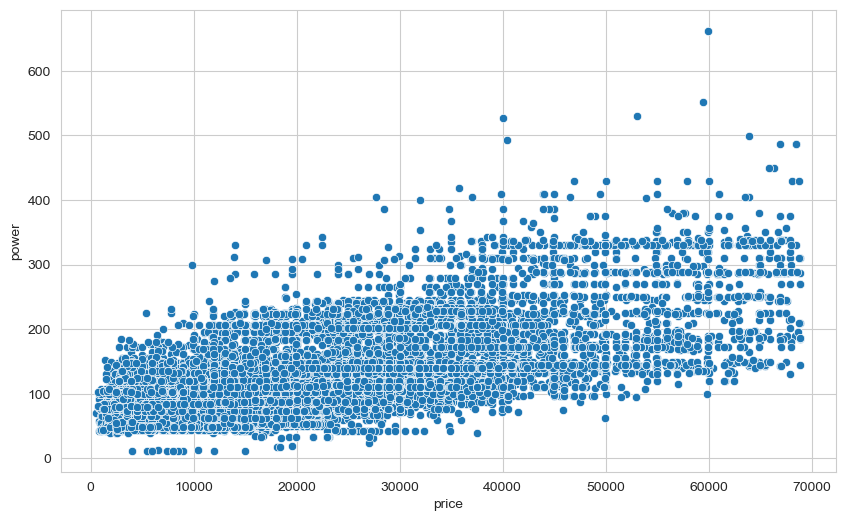

In [97]:
sns.scatterplot(data=df, x="price", y="power");

In [98]:
df[df["power"]>450].make_model.value_counts()

make_model
Ford Mustang    9
Name: count, dtype: int64

In [99]:
df[df["power"]>450].fuel_type.value_counts()

fuel_type
Benzin    9
Name: count, dtype: int64

In [100]:
df[df["power"] > 450][["make_model", "age", "body_type", "gearbox","cylinders", "drivetrain", "gears", "engine_size", "fuel_type","power"]].sort_values(by="power")

,make_model,age,body_type,gearbox,cylinders,drivetrain,gears,engine_size,fuel_type,power
18603,Ford Mustang,9.00,Convertible,Manual,8.00,Rear,6.00,5812.00,Benzin,487.00
18997,Ford Mustang,9.00,Coupe,Manual,4.00,Rear,6.00,5800.00,Benzin,487.00
18998,Ford Mustang,9.00,Coupe,Manual,4.00,Rear,6.00,5800.00,Benzin,487.00
18642,Ford Mustang,9.00,Convertible,Automatic,8.00,Front,10.00,5038.00,Benzin,493.00
18690,Ford Mustang,4.00,Convertible,Automatic,8.00,Rear,10.00,5083.00,Benzin,499.00
18598,Ford Mustang,14.00,Convertible,Manual,8.00,Rear,6.00,54009.00,Benzin,527.00
18882,Ford Mustang,7.00,Coupe,Automatic,8.00,Front,10.00,4951.00,Benzin,530.00
18884,Ford Mustang,5.00,Coupe,Manual,8.00,Rear,6.00,5000.00,Benzin,552.00
18993,Ford Mustang,9.00,Coupe,Manual,8.00,Rear,6.00,5400.00,Benzin,662.00


In [101]:
df = df.drop(df[df['power'] > 450].index)

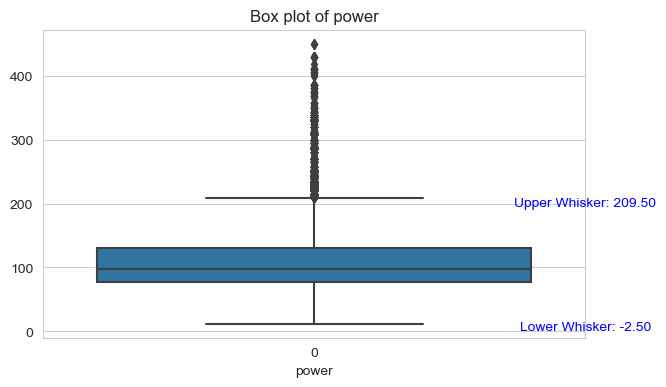

In [102]:
box_plot_column(df, 'power')

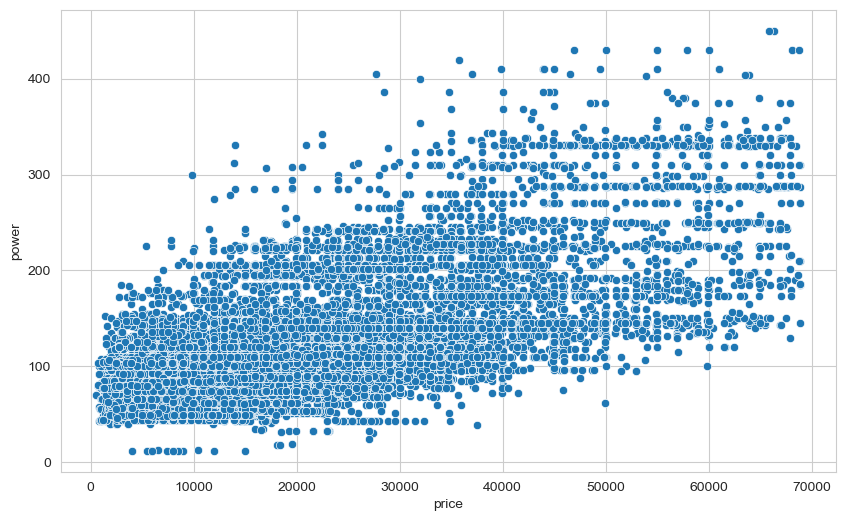

In [103]:
sns.scatterplot(data=df, x="price", y="power");

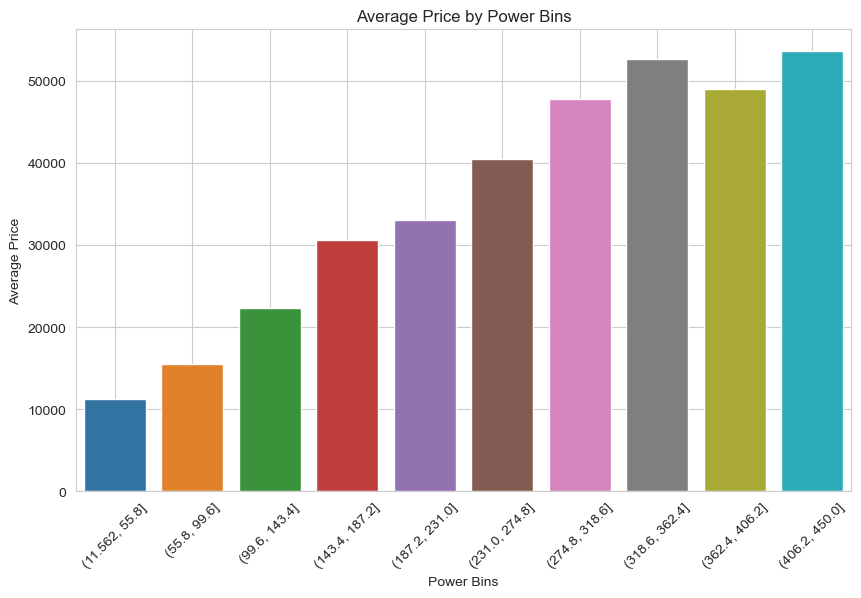

In [104]:
# Yakıt tüketimini 10 parçaya bölmek
df['power_bin'] = pd.cut(df['power'], bins=10)
# Her bir parça için ortalama fiyatları hesaplamak
price_mean_by_bin = df.groupby('power_bin')['price'].mean().reset_index()
# Çubuk grafik çizmek
plt.figure(figsize=(10, 6))
sns.barplot(x='power_bin', y='price', data=price_mean_by_bin)
plt.title('Average Price by Power Bins')
plt.xlabel('Power Bins')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1600x600 with 0 Axes>

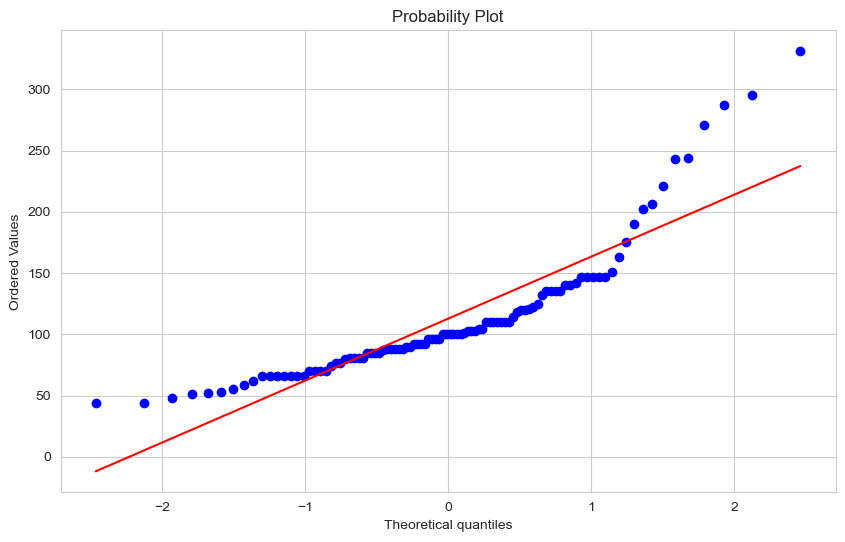

In [105]:
plt.figure(figsize=(16, 6))

# Sample 100 observations from the 'price' column
my_data = df['power'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
#plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> mileage </span></h1>
</div>

In [106]:
describe("mileage")

Column Name    :  mileage
----------------------------------------
Per_of_nulls   :  % 0.0
Num_of_nulls   :  0
Num_of_uniques :  13310
----------------------------------------
mileage
10.00        474
1.00         138
5.00          99
100.00        97
5000.00       95
            ... 
5654.00        1
223889.00      1
127390.00      1
194608.00      1
230047.00      1
Name: count, Length: 13310, dtype: int64


In [107]:
# Descriptive Satatistics on "mileage"

display(df.mileage.describe())

# Aralıklar arası farklar
diff1 = df.mileage.describe()['mean'] - df.mileage.describe()['std']
diff2 = df.mileage.describe()['25%'] - df.mileage.describe()['min']
diff3 = df.mileage.describe()['max'] - df.mileage.describe()['75%']

print(f"Ortalama değer ({df.mileage.describe()['mean']:.2f}) ile standart sapma ({df.mileage.describe()['std']:.2f}) arasındaki fark {diff1:.2f}.")
print(f"Yüzde 25 lik dilim ({df.mileage.describe()['25%']:.2f}) ile minimum değer ({df.mileage.describe()['min']:.2f}) arasındaki fark {diff2:.2f}.")
print(f"Yüzde 75 lik dilim ({df.mileage.describe()['75%']:.2f}) ile maximum değer ({df.mileage.describe()['max']:.2f}) arasındaki fark {diff3:.2f}.")


count     22123.00
mean      69715.09
std       64896.34
min           0.00
25%       19817.50
50%       54000.00
75%      101000.00
max     1440000.00
Name: mileage, dtype: float64

Ortalama değer (69715.09) ile standart sapma (64896.34) arasındaki fark 4818.75.
Yüzde 25 lik dilim (19817.50) ile minimum değer (0.00) arasındaki fark 19817.50.
Yüzde 75 lik dilim (101000.00) ile maximum değer (1440000.00) arasındaki fark 1339000.00.


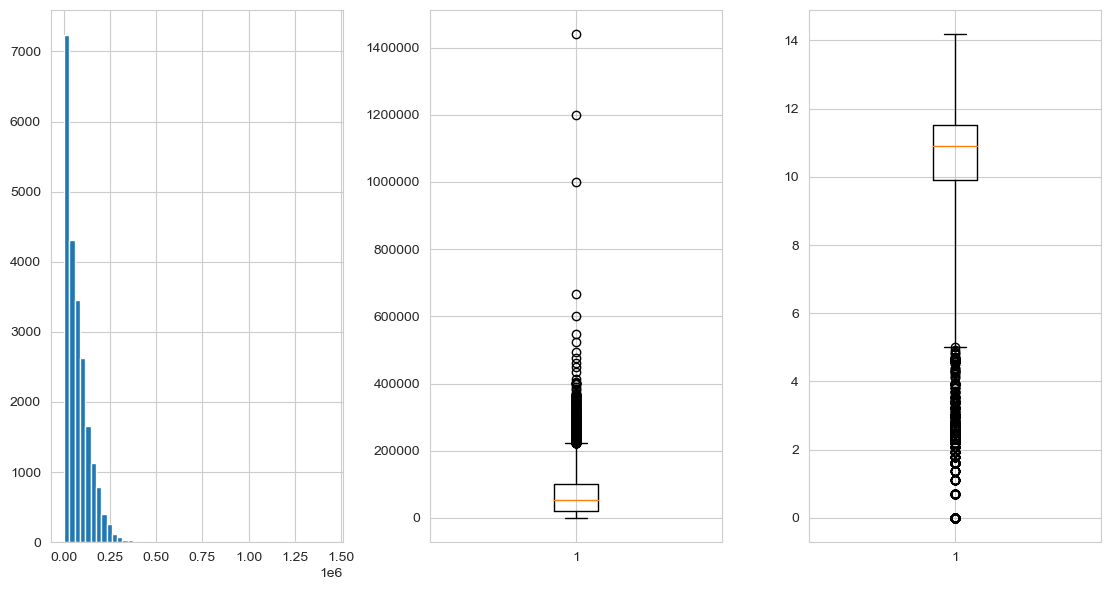

In [108]:
# “mileage” Sütunundaki gözlemlerin nasıl dağıldığını Histogram ve Boxplot aracılığıyla kontrol edelim
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.hist(df.mileage, bins = 50)
#plt.ticklabel_format(style='plain', axis='x')
plt.subplot(142)
plt.boxplot(df.mileage)     
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(143)
plt.boxplot(np.log(df.mileage), whis = 3)    # 3 whisker box plot
plt.tight_layout()
plt.show()

In [109]:
df.mileage.sort_values().head(25)  # En düşük 25 değer

14153   0.00
9770    0.00
19282   0.00
3718    0.00
21247   0.00
5619    0.00
20037   0.00
9836    0.00
19964   0.00
19027   0.00
13153   0.00
13196   0.00
9954    0.00
14441   0.00
9149    0.00
3894    0.00
10078   0.00
3578    0.00
9742    0.00
16110   0.00
2972    0.00
2999    0.00
8725    1.00
3983    1.00
5439    1.00
Name: mileage, dtype: float64

In [110]:
df.mileage.sort_values().tail(25)   # En yüksek 25 değer

23156    370246.00
10536    372008.00
11668    379400.00
14276    383754.00
22039    390000.00
2644     398850.00
21781    399000.00
22473    399900.00
22454    400332.00
21344    402000.00
8129     402933.00
1817     406000.00
12798    415000.00
23190    433850.00
23181    448914.00
5674     461626.00
17466    477000.00
2751     494457.00
16089    523992.00
12780    546888.00
12766    600000.00
11671    667128.00
19999   1000001.00
10737   1199900.00
16505   1440000.00
Name: mileage, dtype: float64

In [111]:
df[df["mileage"] > 999998][["make_model", "body_type", "mileage", "age","previous_owner","price"]]

,make_model,body_type,mileage,age,previous_owner,price
10737,Seat Ibiza,Compact,1199900.00,4.00,1.00,10200
16505,Nissan Micra,Compact,1440000.00,3.00,1.00,14400
19999,Ford Fiesta,Sedan,1000001.00,4.00,1.00,9990


In [112]:
drop_1M_mile_index = df[df["mileage"] > 999998].index
drop_1M_mile_index

Index([10737, 16505, 19999], dtype='int64')

In [113]:
print(df.shape)
df.drop(drop_1M_mile_index, inplace=True)
print(df.shape)

(22123, 33)
(22120, 33)


In [114]:
df[(df["mileage"] < 100) & (df["age"] > 1)][["make_model", "body_type", "mileage", "age","previous_owner","price"]]
print(f"1 yaşından ve 100 km den küçük olan araçların sayısı : ", (len(df[(df["mileage"] < 100) & (df["age"] > 1)])))

1 yaşından ve 100 km den küçük olan araçların sayısı :  36


In [115]:
drop_100_mile_1_age_index = df[(df["mileage"] < 100) & (df["age"] > 1)].index
drop_100_mile_1_age_index

Index([ 3184,  5054,  5057,  5114,  5708,  6138,  7376,  7593,  7679,  8361,
        8482,  9055,  9865, 10165, 10836, 14256, 14316, 14327, 14345, 14374,
       14378, 15542, 16177, 16507, 17134, 17524, 17658, 17682, 17696, 17698,
       17699, 19027, 20378, 20439, 21085, 21686],
      dtype='int64')

In [116]:
print(df.shape)
df.drop(drop_100_mile_1_age_index, inplace=True)
print(df.shape)

(22120, 33)
(22084, 33)


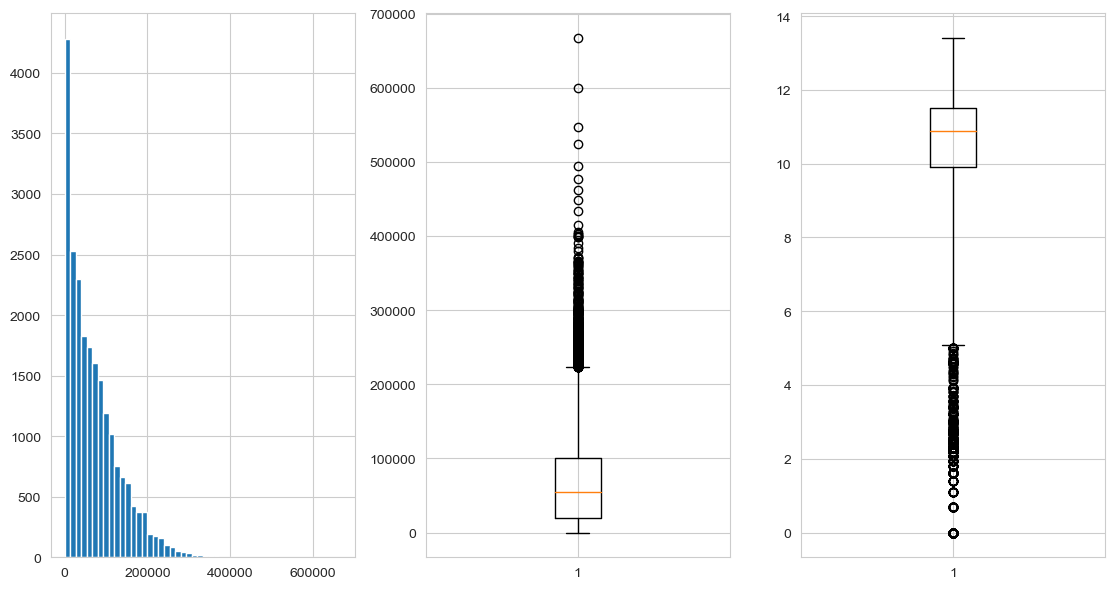

In [117]:
# Gözlemleri Drop ettikten sonraki Boxplot ve Histogram

plt.figure(figsize=(15,6))
plt.subplot(141)
plt.hist(df.mileage, bins = 50)
#plt.ticklabel_format(style='plain', axis='x')
plt.subplot(142)
plt.boxplot(df.mileage)     
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(143)
plt.boxplot(np.log(df.mileage), whis = 3)    # 3 whisker box plot
plt.tight_layout()
plt.show()

Kilometre geniş bir değer aralığına sahip bir değişkendir. Yukarıdaki bu uç değerler gerçek dünya senaryosunun bir parçası olabileceğinden gerçek aykırı değerler olarak ***KABUL EDİLEMEZ***; ancak regresyon doğrularını etkileyebilir, regresyon doğrularını diğer verileri tahmin etmede daha az doğru hale getirebilir ve en iyi uyum doğrusunun eğiminin beklediğinizden daha az dik olmasına neden olabilir. Dolayısıyla, bu uç değerleri olduğu gibi tutmayacağız.

**🧐 [Aykırı değerlerin regresyon modeli üzerindeki etkileri?](https://whanchoi.people.uic.edu/TheEffectofOutliersonRegressionAnalysis.pdf)**

</ul>
</li>  
  <li class="nav-item">
    <a class="nav-link" style="background-color:; color:green" href="https://community.ibm.com/community/user/ai-datascience/blogs/moloy-de1/2021/03/23/points-to-ponder"><b>Tukey Fences for Outliers</b></a>
  </li>
</ul>

In [118]:
limits(df,"mileage")

Lower Limit: -101852.125
Upper limit: 222832.875


In [119]:
outliers(df,"mileage")

616

In [120]:
dropping_of_outliers(df,"mileage")

0       120200.00
1        18995.00
2       197000.00
3       165000.00
4        83339.00
           ...   
23555   114000.00
23556   166512.00
23557   145000.00
23558    96000.00
23559    94343.00
Name: mileage, Length: 21468, dtype: float64

In [121]:
Q1 = df["mileage"].quantile(0.25)
Q3 = df["mileage"].quantile(0.75)
IQR = Q3 - Q1

In [122]:
IQR,Q3,Q1

(81171.25, 101076.0, 19904.75)

In [123]:
# Burada Tukey in Fance kuralından faydalanalım
# Birinci ve Üçüncü Quantil ve Quantiller Arası Aralığı belirleyelim 
# böylece uç değerleri düşürmek için çitin en düşük ve en yüksek sınırlarını hesaplayabiliriz


print("Outliers çıkarılmadan önceki satır sayısı:", len(df))
Q1 = df["mileage"].quantile(0.25)
Q3 = df["mileage"].quantile(0.75)
IQR = Q3 - Q1

whisker_low  = Q1 - 1.5 * IQR
whisker_high = Q3 + 2 * IQR

df = df.loc[(df["mileage"] > whisker_low) & (df["mileage"] < whisker_high)]
df.reset_index(drop=True, inplace=True)
print("Outliers Drop edildikten sonraki satır sayısı:", len(df))

Outliers çıkarılmadan önceki satır sayısı: 22084
Outliers Drop edildikten sonraki satır sayısı: 21853


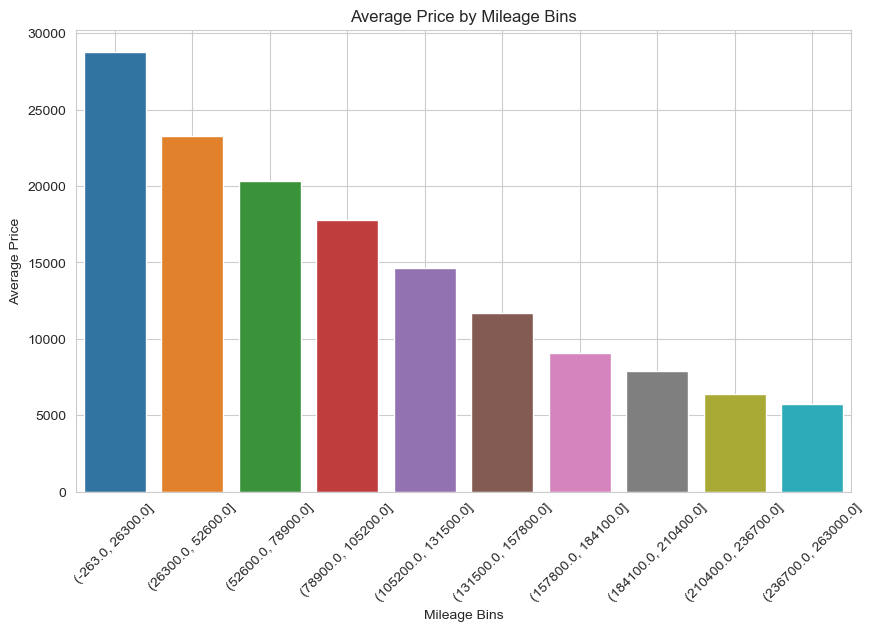

In [124]:
# Yakıt tüketimini 10 parçaya bölmek
df['mileage_bin'] = pd.cut(df['mileage'], bins=10)
# Her bir parça için ortalama fiyatları hesaplamak
price_mean_by_bin = df.groupby('mileage_bin')['price'].mean().reset_index()
# Çubuk grafik çizmek
plt.figure(figsize=(10, 6))
sns.barplot(x='mileage_bin', y='price', data=price_mean_by_bin)
plt.title('Average Price by Mileage Bins')
plt.xlabel('Mileage Bins')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

                                           TUKEY FENCES sonrası ***mileage*** dağılımı

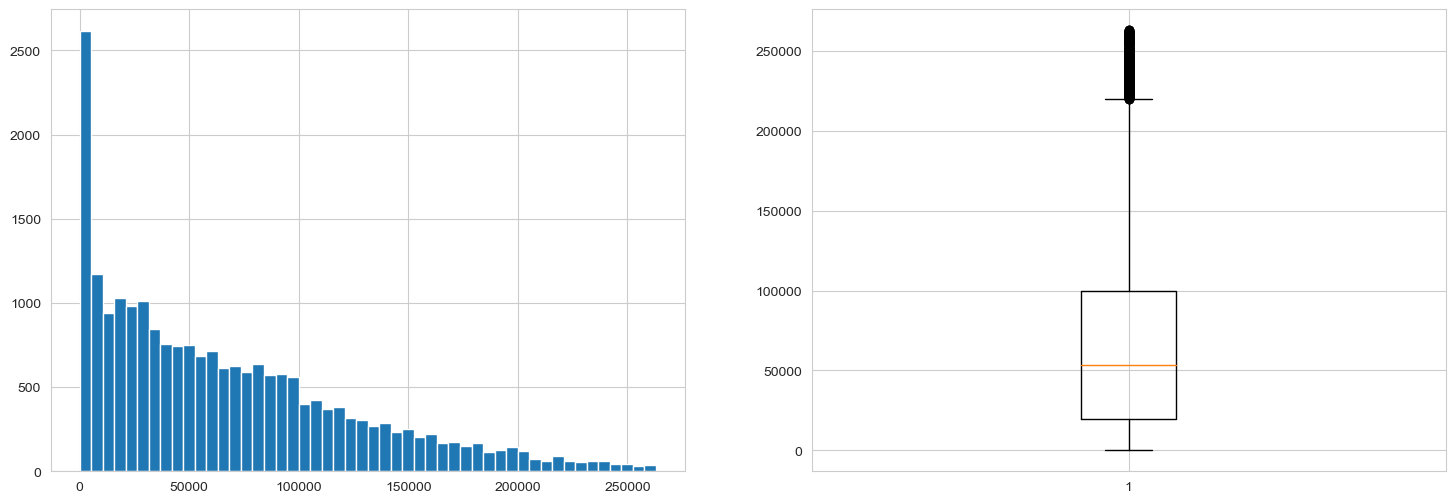

In [125]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.hist(df.mileage, bins=50)
plt.subplot(122)
plt.boxplot(df.mileage)
plt.show()

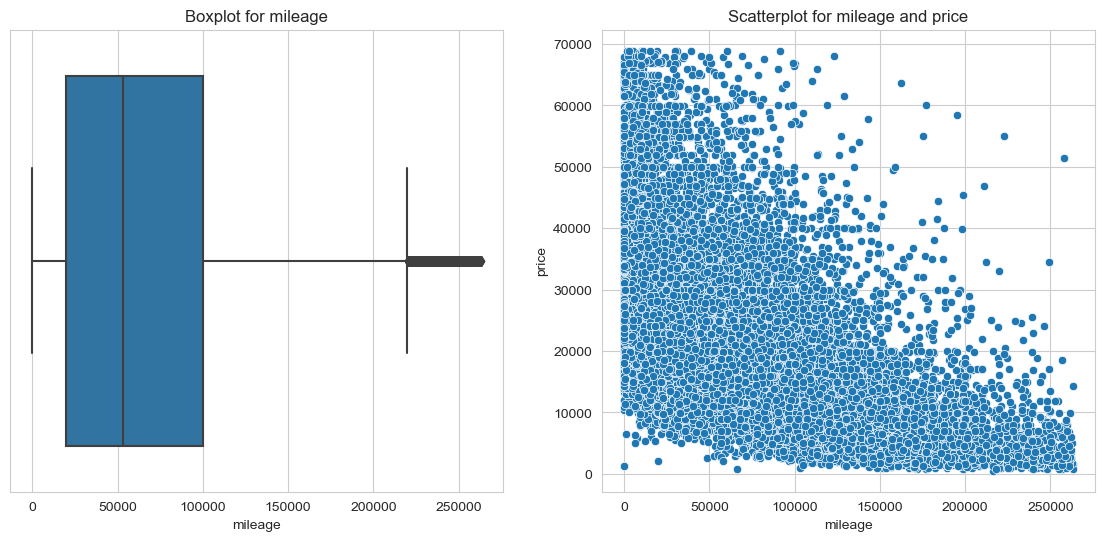

In [126]:
analyze("mileage")

<Figure size 2000x600 with 0 Axes>

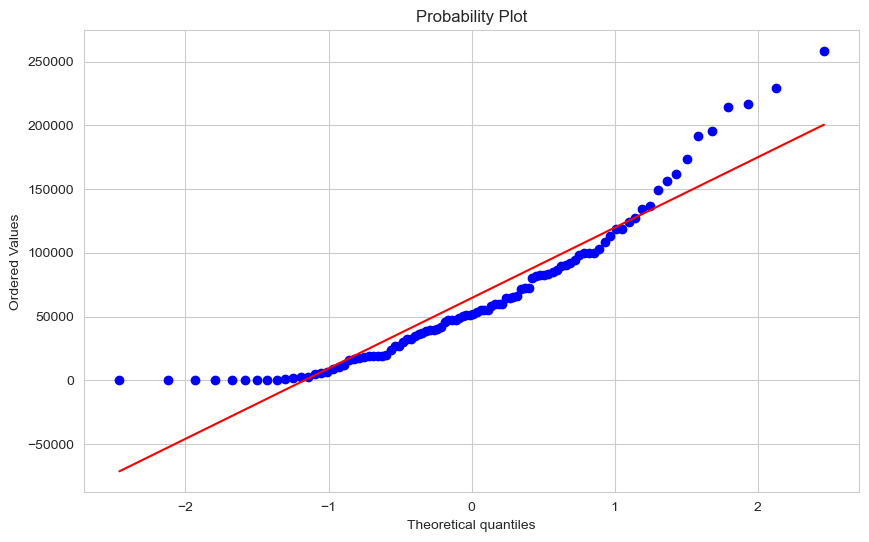

In [127]:
plt.figure(figsize=(20, 6))

# 'mileage' sütunundan rastgele alınan 100 örneklem
df_sample = df['mileage'].sample(100)

# Örneklemin ortalama ve standart sapması
mu = np.mean(df_sample)
sigma = np.std(df_sample)

# Örneklemle aynı ortalama ve standart sapmaya sahip bir normal dağılım oluşturun
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Q-Q plot
fig, ax = plt.subplots()
stats.probplot(df_sample, dist="norm", plot=ax)
plt.show();

<Axes: >

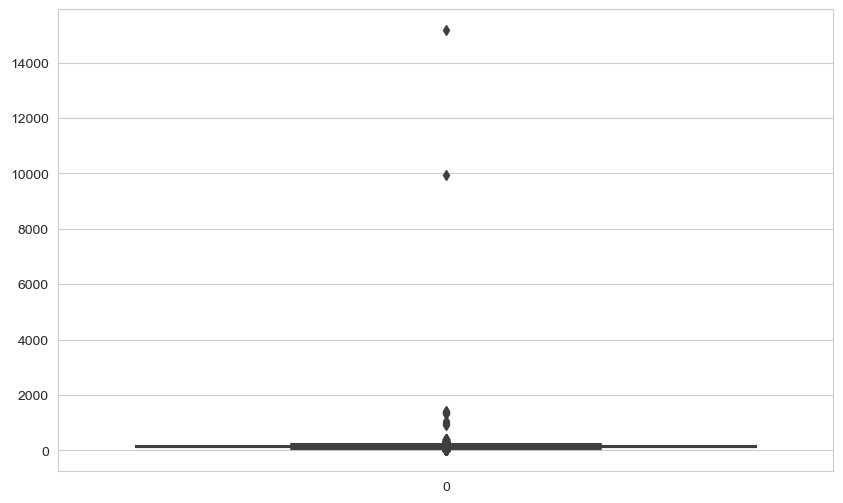

In [128]:

sns.boxplot(df['co_emissions'], whis=1.5)

In [ ]:
def identify_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 2.0 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Identify outliers in the co_emissions column
outliers_mask = identify_outliers(df['co_emissions'])

# Replace outliers with NaN
df.loc[outliers_mask, 'co_emissions'] = np.nan

# Replace NaN values with the mode value of each subgroup defined by make_model and fuel_type
df.co_emissions.fillna(df.groupby(['make_model', 'engine_size', 'cylinders', 'power', 'fuel_type'])['co_emissions'].transform(lambda x: x.fillna(x.mode().max())), inplace = True)

In [ ]:

sns.boxplot(df['co_emissions'], whis=2)

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> engine_size </span></h1>
</div>

In [ ]:
df.engine_size.describe()

In [ ]:
# Descriptive Satatistics on "mileage"

display(df.engine_size.describe())

# Aralıklar arası farklar
diff1 = df.engine_size.describe()['mean'] - df.engine_size.describe()['std']
diff2 = df.engine_size.describe()['25%'] - df.engine_size.describe()['min']
diff3 = df.engine_size.describe()['max'] - df.engine_size.describe()['75%']

print(f"Ortalama değer ({df.engine_size.describe()['mean']:.2f}) ile standart sapma ({df.engine_size.describe()['std']:.2f}) arasındaki fark {diff1:.2f}.")
print(f"Yüzde 25 lik dilim ({df.engine_size.describe()['25%']:.2f}) ile minimum değer ({df.engine_size.describe()['min']:.2f}) arasındaki fark {diff2:.2f}.")
print(f"Yüzde 75 lik dilim ({df.engine_size.describe()['75%']:.2f}) ile maximum değer ({df.engine_size.describe()['max']:.2f}) arasındaki fark {diff3:.2f}.")


In [ ]:
sns.boxplot(df.engine_size);

In [ ]:
df[(df.engine_size<500)]["engine_size"].value_counts()

In [ ]:
df.loc[(df.engine_size<500) & (df.engine_size!=0), 'engine_size'] = np.nan

In [ ]:
df["engine_size"].value_counts(dropna=False).sort_index()

In [ ]:
df['engine_size'] = df['engine_size'].fillna(df.groupby(["make_model", "drivetrain","power",])['engine_size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df.engine_size.isnull().sum()

In [ ]:
df['engine_size'] = df['engine_size'].fillna(df.groupby(["make_model","power",])['engine_size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df.engine_size.isnull().sum()

In [ ]:
df['engine_size'] = df['engine_size'].fillna(df.groupby(["make_model","body_type"])['engine_size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df.engine_size.isnull().sum()

In [ ]:
df['engine_size'] = df['engine_size'].fillna(df.groupby(["make_model"])['engine_size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
drop_engine = df[df.engine_size.isnull()].index

In [ ]:
df.drop(drop_engine,inplace=True)

In [ ]:
df.loc[df["engine_size"]>=15000,["engine_size"]]=np.nan

In [ ]:
sns.boxplot(df.engine_size);

In [ ]:
df[df.engine_size>2200] .make_model.value_counts()

In [ ]:
df[df.make_model=="Ford Mustang"].engine_size.value_counts()

In [ ]:
sns.scatterplot(data=df, x="power", y="engine_size")

In [ ]:
df[(df.engine_size>4800) & (df.power<200)]

In [ ]:
df.loc[(df.engine_size>4800) & (df.power<200),["power"]]=np.nan

In [ ]:
df['power'] = df['power'].fillna(df.groupby(["make_model","body_type","drivetrain","engine_size"])['power'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df[df.engine_size>5040].make_model.value_counts() #5040 autlier range olarak belirlenmistir.

In [ ]:
engine_size_drop = df[df.engine_size>5040].index

In [ ]:
df.drop(engine_size_drop,inplace=True)

In [ ]:
plt.figure(figsize=(20, 6))

# 'mileage' sütunundan rastgele alınan 100 örneklem
df_sample = df['engine_size'].sample(100)

# Örneklemin ortalama ve standart sapması
mu = np.mean(df_sample)
sigma = np.std(df_sample)

# Örneklemle aynı ortalama ve standart sapmaya sahip bir normal dağılım oluşturun
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Q-Q plot
fig, ax = plt.subplots()
stats.probplot(df_sample, dist="norm", plot=ax)
plt.show();

In [ ]:
df.engine_size.value_counts(dropna=False).sort_index().head(75)

In [ ]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.engine_size, bins = 25)

plt.subplot(122)
sns.boxplot(df.engine_size)  # boxplot based on 2.5 whisker

plt.show()

In [ ]:
# Yakıt tüketimini 10 parçaya bölmek
df['engine_size_bin'] = pd.cut(df['engine_size'], bins=15)

# Her bir parça için ortalama fiyatları hesaplamak
price_mean_by_bin = df.groupby('engine_size_bin')['price'].mean().reset_index()

# Çubuk grafik çizmek
plt.figure(figsize=(10, 6))
sns.barplot(x='engine_size_bin', y='price', data=price_mean_by_bin)
plt.title('Average Price by Engine Size Bins')
plt.xlabel('Engine Size Bins')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df.engine_size.unique()

In [ ]:
def engine_size_category(x):
    
    if x == 0: 
        return "Electric"
    elif x<1450:
        return "Low"
    elif x<2350:
        return "Medium"
    else:
        return "High"

In [ ]:
df["engine_size_cat"] = df.engine_size.transform(lambda x:engine_size_category(x))

In [ ]:
df.drop("engine_size", axis=1,inplace=True)

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> gears </span></h1>
</div>

In [ ]:
describe("gears")

In [ ]:
# Descriptive Satatistics on "mileage"

display(df.mileage.describe())

# Aralıklar arası farklar
diff1 = df.gears.describe()['mean'] - df.gears.describe()['std']
diff2 = df.gears.describe()['25%'] - df.gears.describe()['min']
diff3 = df.gears.describe()['max'] - df.gears.describe()['75%']

print(f"Ortalama değer ({df.gears.describe()['mean']:.2f}) ile standart sapma ({df.gears.describe()['std']:.2f}) arasındaki fark {diff1:.2f}.")
print(f"Yüzde 25 lik dilim ({df.gears.describe()['25%']:.2f}) ile minimum değer ({df.gears.describe()['min']:.2f}) arasındaki fark {diff2:.2f}.")
print(f"Yüzde 75 lik dilim ({df.gears.describe()['75%']:.2f}) ile maximum değer ({df.gears.describe()['max']:.2f}) arasındaki fark {diff3:.2f}.")


In [ ]:
# “gears” Sütunundaki gözlemlerin nasıl dağıldığını Histogram ve Boxplot aracılığıyla kontrol edelim
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.hist(df.gears, bins = 50)
#plt.ticklabel_format(style='plain', axis='x')
plt.subplot(142)
plt.boxplot(df.gears)     
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(143)
plt.boxplot(np.log(df.gears), whis = 3)    # 3 whisker box plot
plt.tight_layout()
plt.show()

In [ ]:
df[df["gears"]==0]

In [ ]:
df.gears.replace(0,np.nan, inplace=True)

In [ ]:
df.gears.value_counts(dropna=False)

In [ ]:
df['gears'] = df['gears'].fillna(df.groupby(["make_model", "gearbox", "body_type"])['gears'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df.gears.value_counts(dropna=False)

In [ ]:
df[df.gears==2]

In [ ]:
df["gears"].replace(2,np.nan, inplace=True)

In [ ]:
df.gears.value_counts(dropna=False)

In [ ]:
df[df.gears==3]["age"]

In [ ]:
df.at[6552, 'gears'] = np.nan

In [ ]:
df.loc[6552]["gears"]

In [ ]:
df['gears'] = df['gears'].fillna(df.groupby(["make_model", "gearbox","fuel_type"])['gears'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df.gears.value_counts(dropna=False)

In [ ]:
df[df.gears==3]

In [ ]:
df[df.make_model == "Renault R 9"] # Renault R 9 arabalari cok eski oldugundan yanlis olduguna karar verilmistir 

In [ ]:
drop_gears = df[df.make_model == "Renault R 9"].index

In [ ]:
df.drop(drop_gears,inplace=True)

In [ ]:
df[df.make_model == "Ford Mustang"]["gears"].value_counts()

In [ ]:
df[(df.make_model == "Ford Mustang") & (df.gears == 3)][["age"]] # bu yastaki Ford Mustanglerin 3 vitesli olma imkani yoktur.

In [ ]:
df.at[17100, 'gears'] = np.nan
df.at[17229, 'gears'] = np.nan

In [ ]:
df['gears'] = df['gears'].fillna(df.groupby(["make_model", "gearbox","fuel_type"])['gears'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df["gears"].replace(1,np.nan, inplace=True)

In [ ]:
df["gears"].value_counts(dropna=False)

In [ ]:
df['gears'] = df['gears'].fillna(df.groupby(["make_model", "gearbox","fuel_type"])['gears'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df["gears"].value_counts(dropna=False)

In [ ]:
df['gears'] = df['gears'].fillna(df.groupby(["make_model", "gearbox"])['gears'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df["gears"].value_counts(dropna=False)

In [ ]:
df['gears'] = df['gears'].fillna(df.groupby(["make_model"])['gears'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df["gears"].value_counts(dropna=False)

In [ ]:
df.dropna(subset=["gears"],inplace=True)

In [ ]:
df["gears"].value_counts(dropna=False)

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> cylinders </span></h1>
</div>

In [ ]:
describe("cylinders")

In [ ]:
# Descriptive Satatistics on "mileage"

display(df.mileage.describe())

# Aralıklar arası farklar
diff1 = df.cylinders.describe()['mean'] - df.cylinders.describe()['std']
diff2 = df.cylinders.describe()['25%'] - df.cylinders.describe()['min']
diff3 = df.cylinders.describe()['max'] - df.cylinders.describe()['75%']

print(f"Ortalama değer ({df.cylinders.describe()['mean']:.2f}) ile standart sapma ({df.cylinders.describe()['std']:.2f}) arasındaki fark {diff1:.2f}.")
print(f"Yüzde 25 lik dilim ({df.cylinders.describe()['25%']:.2f}) ile minimum değer ({df.cylinders.describe()['min']:.2f}) arasındaki fark {diff2:.2f}.")
print(f"Yüzde 75 lik dilim ({df.cylinders.describe()['75%']:.2f}) ile maximum değer ({df.cylinders.describe()['max']:.2f}) arasındaki fark {diff3:.2f}.")


In [ ]:
# “cylinders” Sütunundaki gözlemlerin nasıl dağıldığını Histogram ve Boxplot aracılığıyla kontrol edelim
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.hist(df.cylinders, bins = 50)
#plt.ticklabel_format(style='plain', axis='x')
plt.subplot(142)
plt.boxplot(df.cylinders)     
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(143)
plt.boxplot(np.log(df.gears), whis = 3)    # 3 whisker box plot
plt.tight_layout()
plt.show()

In [ ]:
df.cylinders.replace([1,2], np.nan, inplace=True)

In [ ]:
df.cylinders.value_counts(dropna=False)

In [ ]:
df['cylinders'] = df['cylinders'].fillna(df.groupby(["make_model", "power"])['cylinders'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df.cylinders.value_counts(dropna=False)

In [ ]:
df['cylinders'] = df['cylinders'].fillna(df.groupby(["make_model"])['cylinders'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
df.cylinders.value_counts(dropna=False)

In [ ]:
df[df.cylinders==0]['fuel_type'].value_counts()

In [ ]:
benzin = df[(df.cylinders==0) & (df.fuel_type=="Benzin")]['fuel_type'].index

In [ ]:
df.loc[benzin,["make_model","body_type", "power","cylinders"]]

In [ ]:
# elektrikli araclarin cylinder sayisi olmayacagindan dolayi sutunun dusulmesi kanisina varilmistir.
df.drop(["cylinders"], axis=1,inplace=True)

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> safety_security </span></h1>
</div>

In [ ]:
def security_category(x):
    if 'Premium' in x:
        return 'Premium'
    elif 'Middle' in x:
        return 'Middle'
    else:
        return 'Basic'
df['safety_security_category'] = df['safety_security'].apply(security_category)

In [ ]:
df.drop(["safety_security"], axis=1, inplace=True)

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> extras_count </span></h1>
</div>

In [ ]:
df["extras_category"] = df["extras_count"].transform(lambda x: "luxury" if x > 7.0 else "standard")

In [ ]:
df.drop(["extras_count"], axis=1, inplace=True)

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> seats </span></h1>
</div>

In [ ]:
df["comfort_convenience_count"] = df["comfort_convenience"].apply(lambda x: 0 if pd.isna(x) else len(x.split(",")))

In [ ]:
df["comfort_convenience_count"].value_counts().sort_index().cumsum()

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Column name :<span style="color:red"> comfort_convenience_count </span></h1>
</div>

In [ ]:
df["comfort_convenience_cat"] = df["comfort_convenience_count"].transform(lambda x: "luxury" if x > 18.0 else "standard")

In [ ]:
df.drop(["comfort_convenience_count"], axis=1, inplace=True)

In [ ]:
df.drop(["comfort_convenience"], axis=1, inplace=True)

In [ ]:
df.drop(["fuel_consumption_bin"], axis=1, inplace=True)
df.drop(["power_bin"], axis=1, inplace=True)
df.drop(["mileage_bin"], axis=1, inplace=True)
df.drop(["engine_size_bin"], axis=1, inplace=True)

In [ ]:
df.to_csv("ara.csv")

<a id="18"></a>
# <p style="background-color:#3498DB; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> :sparkles: Final Step :sparkles:</p>

In [ ]:
df.T

# Drop Duplicated 

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

In [ ]:
df.corr(numeric_only=True)

In [ ]:
heat_map = df.corr(numeric_only=True)

In [ ]:
sns.heatmap(heat_map, annot=True, cmap="YlGnBu");

In [ ]:
# heatmap sonucu emissions, seats, dorrs, previous owner,  in corr u 

In [ ]:
df.describe(include = "O").T 

In [ ]:
sns.regplot(data=df, x="price", y="age",line_kws={"color":"Red"});

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x="age", y="price", data=df, alpha=0.5)
plt.title("Age vs Price Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [ ]:
sns.scatterplot(data=df, x="price", y="age", hue="engine_size_cat");

In [ ]:
sns.scatterplot(data=df, x="price", y="age", hue="fuel_type");

In [ ]:
sns.scatterplot(data=df, x="price", y="age", hue="body_type");

In [ ]:
sns.scatterplot(data=df, x="mileage", y="age",hue="body_type");

In [ ]:
sns.regplot(data=df, x="mileage", y="age",line_kws={"color":"Red"});

# Power

In [ ]:
sns.regplot(data=df, x="power", y="price",line_kws={"color":"Red"});

In [ ]:
sns.scatterplot(data=df, x="power", y="price", hue="engine_size_cat");

In [ ]:
sns.scatterplot(data=df, x="power", y="price", hue="age");

In [ ]:
# grafik analizi sonucunda farkedilen outlierlar drop edilecektir.
df[(df.price>50000) & (df.age>15)]

In [ ]:
df.drop([3865,4447,5633], axis=0, inplace=True)

In [ ]:
sns.scatterplot(data=df, x="power", y="price", hue="age");

# engine_size_cat

In [ ]:
sns.barplot(data=df, x="engine_size_cat", y="price");

In [ ]:
sns.barplot(data=df, x="engine_size_cat", y="price", hue="gearbox");

In [ ]:
# Elektrikli araclarin manuel olamayacagi durmdan dolayi outlier olduklarina karar verip inceledik.
df[(df.engine_size_cat=="Electric") & (df.gearbox=="Manual")]

In [ ]:
# outlier olduklarini farkedip drop etme karari aldik


In [ ]:
df.loc[[5630,9408,17607,19361,7573,11621,12429],"gearbox"].replace("Manual","Automatic", inplace=True)

In [ ]:
for index in [5630,9408,17607,19361,7573,11621,12429]:
    df.at[index, 'gearbox'] = 'Automatic'

In [ ]:
for index in [5630,9408,17607,19361,7573,11621,12429]:
    df.at[index, 'fuel_type'] = 'Electric'

In [ ]:
df[(df.engine_size_cat=="Electric") & (df.gearbox=="Manual")]

In [ ]:
#engine sizelarini bilmedigim icin drop ediyorum
df.drop([1736,2003,3457,6214,7521,15890],axis=0, inplace=True)

In [ ]:
sns.barplot(data=df, x="engine_size_cat", y="price", hue="gearbox");

In [ ]:
sns.barplot(data=df, x="engine_size_cat", y="price", hue="drivetrain");

In [ ]:
sns.barplot(data=df, x="engine_size_cat", y="price", hue="age");

# mileage

In [ ]:
sns.regplot(data=df, x="mileage", y="price",line_kws={"color":"Red"});

In [ ]:
sns.scatterplot(data=df, x="mileage", y="price", hue="age");


In [ ]:
sns.scatterplot(data=df, x="mileage", y="price", hue="previous_owner");


In [ ]:
#previous owner i gruplanmaasi gerektigine kanaat getirdim.

df["previous_owner"] = df.previous_owner.apply(lambda x: x if x==1 else 2)

In [ ]:
df["previous_owner"] = df.previous_owner.apply(lambda x: "First Hand" if x==1 else "Second Hand")

In [ ]:
sns.scatterplot(data=df, x="mileage", y="price", hue="previous_owner");

In [ ]:
sns.scatterplot(data=df, x="mileage", y="price", hue="seller");

# seller

In [ ]:
sns.barplot(data=df, x="seller", y="price");

In [ ]:
sns.barplot(data=df, x="make", y="price", hue="seller");

In [ ]:
sns.barplot(data=df, x="location", y="price", hue="seller");

# Smoker

In [ ]:
sns.barplot(data=df, x="non_smoker_vehicle", y="price");

In [ ]:
sns.barplot(data=df, x="location", y="price", hue="non_smoker_vehicle");

# full_service_history

In [ ]:
sns.barplot(data=df, x="full_service_history", y="price");

# emission_class

In [ ]:
sns.barplot(data=df, x="emission_class", y="price");

In [ ]:
sns.barplot(data=df, x="location", y="price", hue="emission_class");

In [ ]:
sns.barplot(data=df, x="emission_class", y="age");

In [ ]:
# emission standartlari geregince duzeltme yapilmistir
#index_6 = df[(df.emission_class != "Euro 6")& (df.age< 6)]["age"].index
#for i in index_6:
 #   df.at[i, 'emission_class'] = "Euro 6"

In [ ]:
sns.barplot(data=df, x="emission_class", y="price");

In [ ]:
df["emission_class"] = df.emission_class.apply(lambda x: "Euro 6" if x=="Euro 6" else "Other")

In [ ]:
sns.barplot(data=df, x="emission_class", y="price");

# upholstery

In [ ]:
sns.barplot(data=df, x="upholstery", y="price");

In [ ]:
sns.barplot(data=df, x="upholstery", y="price", hue="comfort_convenience_cat");

# safety_security_category

In [ ]:
sns.barplot(data=df, x="safety_security_category", y="price");

# entertainment_media_count


In [ ]:
sns.barplot(data=df, x="entertainment_media_count", y="price");

# extras_category

In [ ]:
sns.barplot(data=df, x="extras_category", y="price");

# comfort_convenience_cat

In [ ]:
sns.barplot(data=df, x="comfort_convenience_cat", y="price");

# drivetrain

In [ ]:
sns.barplot(data=df, x="drivetrain", y="price");

In [ ]:
sns.barplot(data=df, x="make", y="price",hue="drivetrain");

In [ ]:
sns.scatterplot(data=df, x="power", y="price", hue="drivetrain");

In [ ]:
sns.barplot(data=df, x="drivetrain", y="price", hue="engine_size_cat");

# paint

In [ ]:
sns.barplot(data=df, x="paint", y="price");

# warranty

In [ ]:
sns.barplot(data=df, x="warranty", y="price");

# type

In [ ]:
sns.barplot(data=df, x="type", y="price");

In [ ]:
sns.barplot(data=df, x="body_type", y="price");

# location

In [ ]:
sns.barplot(data=df, x="location", y="price");


In [ ]:
sns.countplot(data=df, x="make",hue="location");

In [ ]:
sns.scatterplot(data=df, x="power", y="price", hue="location");

# doors

In [ ]:
sns.barplot(data=df, x="doors", y="price");

In [ ]:
sns.scatterplot(data=df, x="power", y="price", hue="doors");

# seats

In [ ]:
sns.barplot(data=df, x="seats", y="price");

# dody_type

In [ ]:
sns.barplot(data=df, x="body_type", y="price");

In [ ]:
sns.barplot(data=df, x="body_type", y="price", hue="doors");

In [ ]:
sns.scatterplot(data=df, x="power", y="price", hue="body_type");

# fuel_consumption_comb

In [ ]:
sns.scatterplot(data=df, x="fuel_consumption_comb", y="price");

# co_emissions

In [ ]:
sns.scatterplot(data=df, x="co_emissions", y="price", hue="emission_class");

In [ ]:
sns.regplot(data=df, x="co_emissions", y="price",line_kws={"color":"Red"});

In [ ]:
#make_model_counts = df['make_model'].value_counts()

# Sadece 10'dan fazla tekrar eden 'make_model' değerlerini filtreleyin
#make_model_to_keep = make_model_counts[make_model_counts > 15].index

# Orijinal DataFrame'de sadece bu 'make_model' değerlerini içeren satırları seçin
#filtered_df = df[df['make_model'].isin(make_model_to_keep)]

In [ ]:
# 1. Analizimizin sonucunda elenecek sutunlari belirledik
atilacaklar_listesi = [ "upholstery","safety_security_category","extras_category", "paint", "warranty", "type" , "drivetrain", "location", "doors", "seats", "fuel_consumption_comb", "co_emissions"]
for i in atilacaklar_listesi:
    filtered_df.drop(i,axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df.T

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['make_model_encoded'], unique_values = pd.factorize(df['make_model'])

In [ ]:
df.drop("make_model",axis=1 ,inplace=True)

In [ ]:
df_dummy = pd.get_dummies(data = df, drop_first=True)
df_dummy

In [ ]:
#sns.regplot(data=df, x="mileage", y="price",line_kws={"color":"Red"});
#sns.scatterplot(data=df, x="power", y="price", hue="age");
#sns.barplot(data=df, x="engine_size_cat", y="price");
#line_kws={"color":"Red"}
df.columns

In [ ]:
#df.to_csv("final_2.csv",index=False)

In [ ]:
# analizlerimiz sonucu age, power, engine_size, mileage, seller, emission_class,entertainment_media_count,comfort_convenience_cat,
#previous_owner, *body_type*


# drop non smoker vehicle, full_service_history, upholstery,safety_security_category,extras_category, paint, warranty,
# type, drivetrain, location, doors, seats, fuel_consumption_comb,fuel_consumption_bin, co_emissions
